# LAB: Solid State Spin Laboratory


* Introduction





* Pre-lab reading: Read the introduction to the quTools quNV experiment [here](https://qutools.com/qunv/) 


## Cavity-coupled quantum electrodynamic (QED) sensor
 Hanfeng Wang, Matthew E. Trusheim, and Dirk Englund - Dec. 2022

Resonators for electromagnetic fields in the range of 1-100 GHz are essential in a range of quantum technologies, including superconducting quantum computers, microwave-optical quantum information interfaces, as well as sensors. Here, we consider microwave cavities coupled to ensembles of electron and nuclear spins associated with nitrogen vacancy (NV) centers in diamond. Following the discovery of coherent quantum dynamics of NV centers in the late 1990s, NV centers have emerged as leading quantum sensors for quantities ranging from electromagnetic fields to temperature, strain, rotation (gyroscopes), and have even been proposed for exotic schemes like dark matter detection. The key advantages of NV centers in sensing applications, over other electron spin systems, are their long coherence times and avaible optical polarization at room temperature.

Suggested reading for this laboratory on hybrid systems of microwave cavities coupled to NV spin ensembles specifically:
-- 1 ) [E. Eisenach et al, Cavity-enhanced microwave readout of a solid-state spin sensor](https://www.nature.com/articles/s41467-021-21256-7)
 
-- [optional] [JF Barry et. al. Sensitivity optimization for NV-diamond magnetometry](https://https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.92.015004)

-- [optional] [ D. Fahey et. al., Steady-state microwave mode cooling with a diamond NV ensemble](https://https://arxiv.org/abs/2203.03462)


-- [ME Trusheim et. al. A Polariton-Stabilized Spin Clock
](https://arxiv.org/abs/2009.02427)


Upon optical excitation, nonradiative decay through a spin-state-dependent intersystem crossing produces spin-state-dependent fluorescence contrast and polarize NV spin to m_s = 0 ground state. A common way for NV spin readout relies on detecting this spin-state-dependent fluorescence. However, due to the low photon detection efficiency (C~0.015) for NV ensemble, the NV magnetic sensitivity is limited by the photon-shot-noise-limit. 

One way to solve this problem is to use NV-cavity coupling, where we couple NV centers to another system (cavity in this case) and read the NV resonance frequency by via the cavity mode.



1.   List item
2.   List item





:::{figure-md} cavity-QED-setup
<img src="https://drive.google.com/uc?export=view&id=1GHuXwtSyHI6-wn5o7Llhv7QndVyWUVbk" alt="HOM-setup" class="bg-primary mb-1" width="800px">

Experimental setup for studying quantum spins. 
:::

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline

@widgets.interact_manual(
    g0_in=(0.01, 1.),kc0_in=(1., 1000.),kc1_in=(1., 1000.),ks_in=(1., 1000.))
def runFunc(g0_in=0.01, kc0_in = 70, kc1_in = 111, ks_in = 308):
    kc0 = 2*np.pi*kc0_in; #kHz  Cavity linewidth
    kc1 = 2*np.pi*kc1_in; #kHz   Cavity-loop coupling (output coupling)

    ks = 2*np.pi*ks_in; #kHz  Spin coherence time


    density_NVs = 5; #PPM Density of NV centers in the diamond, given in ppm
    diamondDensity = 1.76e29; # atoms/m^3 Atomic density of diamond
    density_NVs_SI = density_NVs*1e-6*diamondDensity; # NV/m^3

    diamond_sample_dim_x=3e-3; # m Diamond spatial dimensions, assuming cuboid
    diamond_sample_dim_y=3e-3; # m
    diamond_sample_dim_z=0.5e-3; # m
    diamond_sample_volume = diamond_sample_dim_x*diamond_sample_dim_y*diamond_sample_dim_z; 

    N_NVs= density_NVs_SI*diamond_sample_volume ; # the number of NVs in the diamond

    g0 = g0_in*1e-3; #kHz   Coupling strength for single spin, see referenced papers  

    geff = g0*np.sqrt(N_NVs); # Total coupling scales as sqrt(N)


    kc = kc0 + kc1; # Total cavity loss

    xnum = 101; # number of points to plot in x
    ynum = 121;

    # initialize sweep parameters 
    wdc = np.linspace(-0.8,0.8,num=xnum)*1e3*2*np.pi;  #kHz  Detuning of the probe frequency and cavity frequency
    wsc = np.linspace(-7.4,7.4,num=ynum)*1e3*2*np.pi;  #kHz  Detuning of the spin frequency and cavity frequency

    # initialize output ararys
    inphaseOut = np.zeros((xnum,ynum));
    quadratureOut = np.zeros((xnum,ynum));

    for ii in range(xnum):

      for jj in range(ynum):

        wds = wdc[ii]-wsc[jj]; #spin-cavity detuning

        # Cavity reflection signal from references
        refOutput = -1 + kc1/(kc/2+1j*wdc[ii]+pow(geff,2)/(ks/2+1j*wds)); 
        inphaseOut[ii][jj] = np.real(refOutput); # In-phase part of the cavity signal 
        quadratureOut[ii][jj] = np.imag(refOutput);  # Quadrature part of the cavity signal 

    y, x = np.meshgrid(np.linspace(-7.4,7.4,num=ynum), np.linspace(-0.8,0.8,num=xnum),)
    fig, figAxes = plt.subplots(2,2,sharex='all', sharey='all')
    ax1 = figAxes[0,0];
    ax2 = figAxes[0,1];
    ax3 = figAxes[1,0];
    ax4 = figAxes[1,1];


    c = ax1.pcolormesh(y, x, quadratureOut)
    ax1.set_title('Q')
    #ax1.set_xlabel('fsc (MHz)')
    ax1.set_ylabel('fdc (MHz)')
    fig.colorbar(c, ax=ax1)

    c = ax2.pcolormesh(y, x, inphaseOut)
    ax2.set_title('I')
    #ax2.set_xlabel('fsc (MHz)')
    #ax2.set_ylabel('fdc (MHz)')
    fig.colorbar(c, ax=ax2)

    c = ax3.pcolormesh(y, x, np.sqrt(pow(quadratureOut,2)+pow(inphaseOut,2)))
    ax3.set_title('P')
    ax3.set_xlabel('fsc (MHz)')
    ax3.set_ylabel('fdc (MHz)')
    fig.colorbar(c, ax=ax3)

    c = ax4.pcolormesh(y, x, np.arctan( np.divide(quadratureOut,inphaseOut)))
    ax4.set_title('Phi')
    ax4.set_xlabel('fsc (MHz)')
    #ax4.set_ylabel('fdc (MHz)')
    fig.colorbar(c, ax=ax4)

    plt.show()      


interactive(children=(FloatSlider(value=0.01, description='g0_in', max=1.0, min=0.01), FloatSlider(value=70.0,…

## Minimum detectable magnetic field

[background in Ref. X, page Y [[add hyperlink]]

Here is the sensitivity analysis for cavity-coupled sensor. In the ideal case, the spin-projection-limit sensitivity is propotional to the inverse of the square root of the number of spins (N). However, the NV decoherence time and dephasing time will decrease during the increase of the NV number. Therefore, the sensivitity will decrease sharply in the large-N regime. The script below calculated the spin-projection-limit sensitivity and photon-shot-noise-limit with different number of spins.

The script below also include the cavity-coupled spin sensor. The scale of the sensitivity in the low-N regime is linear with the 1/N rather than 1/sqrt(N), which offers the possibility for this sensor to go below the spin-projection-limit sensitivity. 

[[ choose here parameters that students can actually modify in the laboratory: i.e., microwave driving power, optical pump power; bias point of microwave readout signal [\omega_probe] ]]

Text(0, 0.5, 'Sensitivity (T/\\sqrt(Hz))')

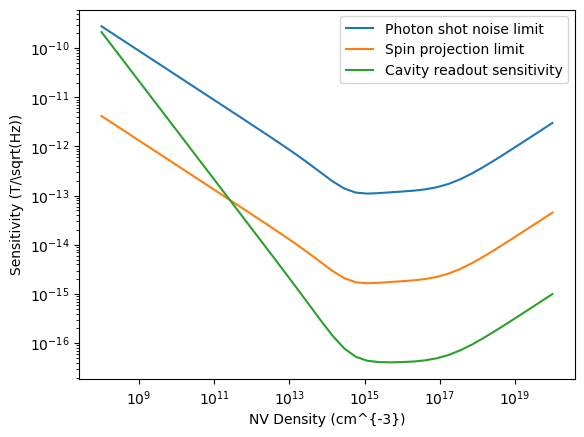

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Delta = 2e6;
f = 0.1;

Sphi = 1e-9; # phase noise

Q = 3e4;  # Quality factor

hbar = 1.05e-34;  

gs = 2; 

muB = 9.27e-24; 

rho = np.logspace(8,20,40)*1e6;

Tc = 1/3.3e-19/(rho*(0.95/0.05));

T2c = 300e-6;

T2 = 1/(1/T2c+1/Tc);

mu0 = 4*np.pi*1e-7;

C = 0.015;

etaB = 8 * pow((hbar/gs/muB),3) * Delta/np.pi/Q/T2 * Sphi * 1/mu0/hbar/rho *1/f * np.exp(pow((T2/T2c),3))* np.exp(T2/Tc)* np.sqrt(1+1e-6/T2);

eta = hbar/muB/gs * np.pi * np.exp(pow((T2/T2c),3))/C/np.sqrt(rho*T2) * np.exp(T2/Tc) * np.sqrt(1+1e-6/T2);

eta_proj = hbar/muB/gs * np.pi * np.exp(pow((T2/T2c),3))/np.sqrt(rho*T2) * np.exp(T2/Tc) * np.sqrt(1+1e-6/T2);

fig,ax = plt.subplots()

ax.loglog(rho/1e6,eta*1/np.sqrt(3e-3*3e-3*0.5e-3),label='Photon shot noise limit')

ax.loglog(rho/1e6,eta_proj*1/np.sqrt(3e-3*3e-3*0.5e-3),label='Spin projection limit')

ax.loglog(rho/1e6,etaB,label='Cavity readout sensitivity')

ax.legend()

ax.set_xlabel('NV Density (cm^{-3})')
ax.set_ylabel('Sensitivity (T/\sqrt(Hz))')




## Lab aims


**Aim 1: Characterizatin of the NV-cavity QED apparatus**



**A1.1: Test the cavity Q and frequency with digital twin**

Put numbers into Digital Twin based on [E. Eisenach et al, Cavity-enhanced microwave readout of a solid-state spin sensor](https://www.nature.com/articles/s41467-021-21256-7). Reproduce curves in the publication. 


**A1.2: Cavity Experiment** 

1. Find cavity resonance frequency. Connect vector network analyzer (VNA) to the cavity and detect S12 reflection signal. Move the position of the loop to critical couple the loop and the cavity. Get the cavity resonance frequency based on the VNA signal. 

2. Analysis the cavity resonance signal. Disconnect the VNA and connect the signal generator (SG) to the circuit. Sweep the frequency near the cavity resonance frequency. Compare the experimental data and simulations from Digital Twin by setting N=0. Get the cavity linewidth κc with the model. 

3. NV-cavity coupling. Turn on the laser and set the power to 8 W. Set the microwave power to -17 dBm and sweep the SG frequency and the voltage (current) in the Helmholtz coil. Use the Digital Twin to check your data and get the coupling strength g_{eff} and spin linewidth κs. 


**A1.3: Power dependence**

Set laser power to be 8 W, and microwave power to be P_opt=[-30,-25,-20,-15,-10,-5,0,5,10] dBm. Plot the refection signal for each microwave power. Compare your result with [E. Eisenach et al, Cavity-enhanced microwave readout of a solid-state spin sensor](https://www.nature.com/articles/s41467-021-21256-7). 

**Aim 2: Magnetic field sensitivity**

Now think about how we can make use of the NV-cavity coupling system. A straightforward thing mentioned before is the magnetometry. 

**A2.1 Sensitivity calculation**

Based on your understanding on the project, write codes to calculate the maximum senstivity you can achieve using the parameters you get from Digital Twin and experiments. 

**A2.2 Power depedence**

Think about how this power dependence is related to the magnetic field sensitivity. Calculated it from the Digital Twin model and compare with the experiment data. 



#### Sensitivity Model

In [23]:
import numpy as np
from scipy.integrate import quad

def compute_geff(rho, gammao, V, gs, Vd):
    """Compute geff using Vd."""
    gamma_th = 90 # thermal relxation rate
    I = 1.225 * gammao - 4.809 * gamma_th + 3.085 * np.sqrt(0.1577 * gammao**2 - 0.5229 * gammao * gamma_th + gamma_th**2)
    Polarization = (0.29*I)/(3*gamma_th + 0.38*I)
    N = (rho * 3.51 / 12.01 * 6.022e23) * Vd * min(Vd,V)/Vd
    geff = gs * np.sqrt(N * Polarization) * 0.153  # Factor adjusted for matching 0.19MHz at current parameters
    return geff

def compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd):
    Gamma = 330e3 / 4 * rho
    alpha2 = 10**(PowerList / 10) * 1e-3 / (energy * kc1 * 2 * np.pi) * (0.53**2)
    beta2 = alpha2 * kc1
    geff = compute_geff(rho, gammao, V, gs, Vd)

    gamma1 = gammao*2/0.46 + 26.4e3*rho
    xi1 = np.sqrt(4 * 2 * gs**2 * alpha2 / gammao * gamma1 + gamma1**2)
    alpha2_v2 = kc1 * beta2 / (kc / 2 + geff**2 * 2 * gamma1 / xi1 / (Gamma + xi1))**2
    xi3 = np.sqrt(4 * 2 * gs**2 * alpha2_v2 / gammao * gamma1 + gamma1**2)
    dVdB = (geff**2 * 4 / (Gamma + xi3)**2 * kc1 /
            (kc / 2 + geff**2 * 2 * gamma1 / xi3 / (Gamma + xi3))**2 *
            vot * 28e9 / np.sqrt(3) * 1e-4 * 2)
    xi = xi1
    xi2 = gamma1 / np.sqrt(xi**2 + gamma1**2)
    geff2 = geff * np.sqrt(xi2)
    Gamma1 = Gamma + gamma1 / xi2
    CC = (kc1 * Gamma1 * geff2**2 /
          (Gamma1**2 / 4 * kc**2 / 4 + geff2**2 * Gamma1 * kc / 2 + geff2**4))
    noise = 0.45e-9 - 0.1345e-9 * CC
    return min(noise / dVdB / 1e4)


### Sensitivity Optimization Over Diamond Volume and NV Density

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


rho_list = np.logspace(-3, 5, 100)
GammaList = 330e3 * rho_list  # inhomogeneous linewidth (Hz)
gammaoList = np.linspace(0.3,3.45,51)*1e3

PowerList = np.linspace(-55, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)

r1 = np.logspace(-3.5, 3, 100)
Vd = 3e-3 * 3e-3 * 0.9e-3   # diamond volume
V0list = Vd * r1   
mu0 = 4 * np.pi * 1e-7
energy = 6.626e-34 * 2.87e9   # h * f
kc0 = 130e3   # cavity linewidth
kc1 = 130e3   # cavity loop coupling
Q = 2e4  # Quality factor
kc = kc0 + kc1  # cavity loss
gs = 0.019   # single coupling strength  

V = 1 * energy / 3 / gs**2 * (28e9)**2 * mu0  # 2/3 due to the geometry factor

sens_Vd_rho = np.zeros((len(V0list), len(rho_list)))

for ii in range(len(r1)):
    V0 = V0list[ii]   # diamond volume
    for jj in range(len(rho_list)):
        rho = rho_list[jj]
        sens0 = []
        
        for kk in range(len(gammaoList)):
            gammao = gammaoList[kk]     # optical polarization rate
            Gamma = GammaList[jj]   # inhomogeneous linewidth
            sens1 = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, V0)
            sens0.append(sens1)
        sens_Vd_rho[ii, jj] = min(sens0)

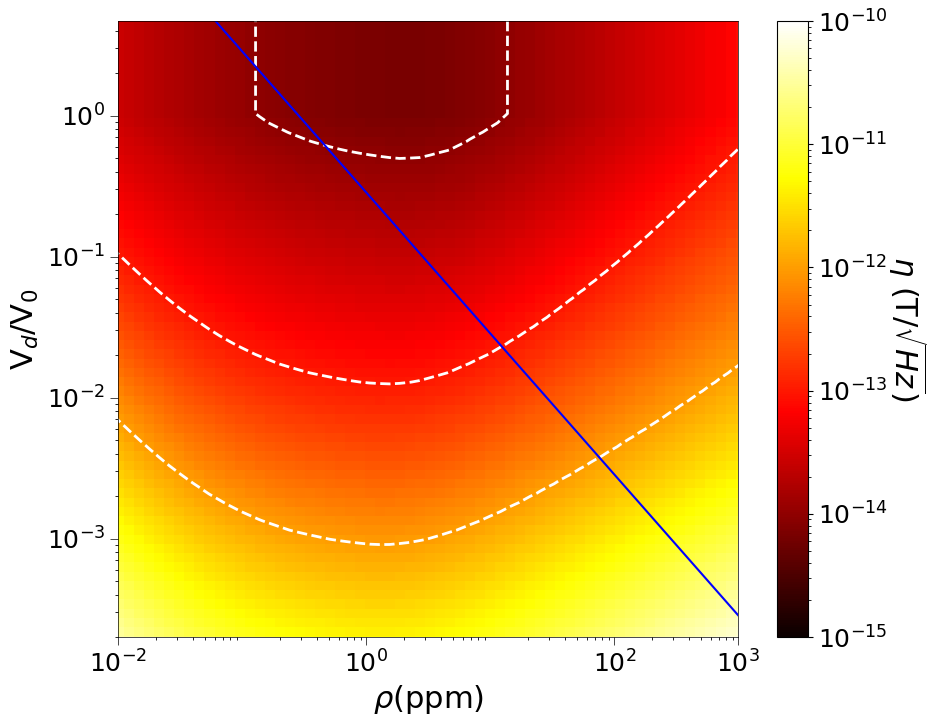

In [29]:
# Create the figure
plt.figure(figsize=(10, 8))

# Calculate rr2 and set the image plot
rr2 = rho_list * 4
rr1 = V0list / V

# Create a meshgrid for rr2 and rr1
RR2, RR1 = np.meshgrid(rr2, rr1)

# Plot the data using pcolormesh
plt.pcolormesh(RR2, RR1, sens_Vd_rho, shading='auto', norm=LogNorm(vmin=1e-15, vmax=100e-12), cmap='hot')

# Set scales to log
plt.xscale('log')
plt.yscale('log')

# Add color bar and label it
cbar = plt.colorbar()
cbar.set_label(r'$\eta$ (T/$\sqrt{Hz}$)', rotation=270, labelpad=30, fontsize=22)
cbar.ax.tick_params(labelsize=18)

# Set axis labels and limits
plt.xlabel(r'$\rho$(ppm)', fontsize=22)
plt.ylabel(r'V$_{d}$/V$_{0}$', fontsize=22)
plt.xlim([1e-2, 1e3])
plt.ylim([2e-4, 4.68])

# Set the line width and tick length
ax = plt.gca()
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(width=0.5, length=6)
ax.tick_params(width=0.5, length=6, labelsize=18)

# Generate contour levels
contour_levels = [2e-15, 1e-14, 1e-13, 1e-12]
contour = plt.contour(RR2, RR1, sens_Vd_rho, levels=contour_levels, colors='w', linewidths=2, linestyles='--')
# plt.clabel(contour, inline=True, fontsize=18, fmt='%.1e', colors='white')

# plt.text(2, 0.008, r'1 pT/$\sqrt{Hz}$', fontsize=18, color='white')
# plt.text(3, 0.15, r'100 fT/$\sqrt{Hz}$', fontsize=18, color='white')
# plt.text(8, 2, r'10 fT/$\sqrt{Hz}$', fontsize=18, color='white')
# plt.text(100, 0.2, r'2 fT/$\sqrt{Hz}$', fontsize=18, color='white')

# Calculate and plot additional lines
h = 2e-26 / 3.5e3 / 3.1e-21 / 4e-6 * 3.4 * 100  # cm
S = np.pi * 0.5**2
V2 = h * S / 1.73

xx = rr2
yy = V2 * 4 / xx

plt.plot(xx, yy, color='blue')  # optiacl polarizatoin limit

ax = plt.gca()
ax.set_xticks([1e-2, 1e0, 1e2, 1e3])
ax.set_yticks([1e-3, 1e-2, 1e-1, 1])

# plt.scatter(4,(3e-3*3e-3*0.9e-3/V), color='violet', zorder=5, s=50, label='Example')

# Show the plot
plt.show()

### Sensitivity Optimization over Cavity Mode Volume and Quality Factor

In [30]:
from scipy.optimize import shgo
import numpy as np
import pandas as pd

def sens_wrapper(params, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd):
    rho, gammao = params    # optimize over NV density and optical polarization rate
    alpha = 0.45 * 100 * rho/0.1
    return compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)
    
Qlist = np.logspace(2, 6, 101)   #quality factor

PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
Vd = 3e-3 * 3e-3 * 0.9e-3   #diamond volume
Vlist = Vd * np.logspace(-5, 5, 101)   #cavity mode volume
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * 2.87e9   #h*f
rhomax = 0.1231 * 4 * 1e-6 / Vd

sens_V_Q = np.zeros((len(Vlist), len(Qlist)))
opt_params_V_Q = np.zeros((len(Vlist), len(Qlist)), dtype=object)

for ii in range(len(Vlist)):
    V = Vlist[ii]
    gs = np.sqrt(energy * (28e9)**2 * mu0 / 3 / V)   #single coupling strength

    for jj in range(len(Qlist)):
        Q = Qlist[jj]   # Quality factor
        kc0 = 2.87e9 / Q   # cavity linewidth
        kc1 = kc0    # cavity loop coupling
        kc = kc0 + kc1   # cavity loss
        
        initial_guess = (1,50e3)
        bounds = ((1e-2,min(rhomax,1e2)),(0.3e3,3.45e3))
        solution = shgo(sens_wrapper, bounds, args=(V, Q, PowerList, vot, energy, gs, kc, kc1, Vd))
        sens_V_Q[ii, jj] = solution.fun
        opt_params_V_Q[ii, jj] = solution.x

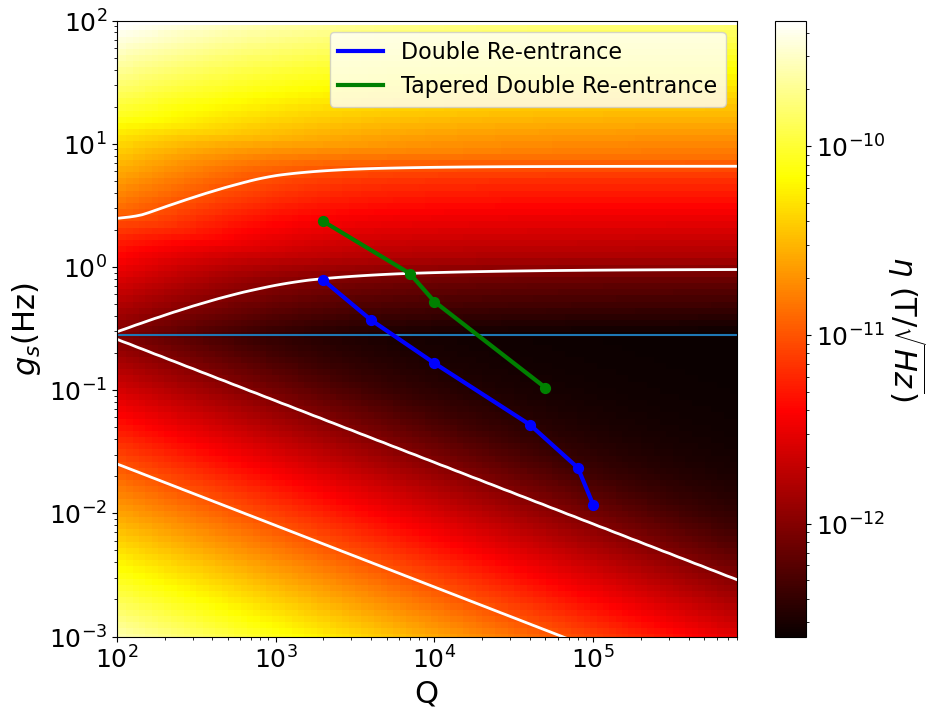

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(Qlist, np.sqrt(energy * (28e9)**2 * mu0 / 3 / Vlist))
plt.figure(figsize=(10, 8))
plt.pcolormesh(X,Y, sens_V_Q, shading='auto', norm=LogNorm(), cmap='hot')

# Add color bar and label it
cbar = plt.colorbar()
cbar.set_label(r'$\eta$ (T/$\sqrt{Hz}$)', rotation=270, labelpad=30, fontsize=22)
cbar.ax.tick_params(labelsize=18)

contour = plt.contour(X,Y, sens_V_Q, levels=[1.3e-14, 1e-13, 1e-12, 1e-11], colors='w', linewidths=2)

plt.xscale('log')
plt.yscale('log')
plt.xlim([1e2, 8e5])
# plt.ylim([9e-3, 300])
plt.ylim([1e-3, 100])
plt.ylabel(r'$g_{s}$(Hz)', fontsize=22)
plt.xlabel('Q', fontsize=22)
def fmt(x):
    return f'{x:.1e} T/$\sqrt{{Hz}}$'  # Replace 'units' with your desired unit
# plt.clabel(contour, inline=True, fontsize=8, fmt=fmt)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)  # Major tick labels

# Compute sensitivity for some of the cavity designs from Choi & Englund "Ultrastrong magnetic light-matter interaction with cavity mode engineering"
double_reentrance = ((9e-7, 2e3), (4e-6, 4e3), (2e-5, 1e4), (2e-4, 4e4), (1e-3, 8e4), (4e-3, 1e5))
dr_y_values, dr_x_values = zip(*double_reentrance)
plt.scatter(np.array(dr_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(dr_y_values)* (3e8/2.87e9)**3)), color='blue', zorder=5, s=50)
plt.plot(np.array(dr_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(dr_y_values)* (3e8/2.87e9)**3)), color='blue', zorder=3, linewidth=3, label='Double Re-entrance')
# long_squeeze = ((7e-4,2e3), (3e-3,1e4), (7e-3, 2e4), (1e-2,4e4), (4e-2,9e4), (7e-2,1e5), (1e-1,2e5))
# long_y_values, long_x_values = zip(*long_squeeze)
# plt.scatter(np.array(long_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(long_y_values)* (3e8/2.87e9))), color='white', s=50, zorder=5, label='Longitudinally Squeezed')
tapered = ((1e-7, 2e3), (7e-7,7e3), (2e-6, 1e4),(5e-5,5e4))
tapered_y_values, tapered_x_values = zip(*tapered)
plt.scatter(np.array(tapered_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(tapered_y_values)* (3e8/2.87e9)**3)), color='green', zorder=5, s=50)
plt.plot(np.array(tapered_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(tapered_y_values)* (3e8/2.87e9)**3)), color='green', zorder=5, linewidth=3, label='Tapered Double Re-entrance')

V_comsol = 1.128e-16/((1.8026e-5)**2)
Q_comsol = 3.1972e9 * mu0 *1.128e-16 /2.2154e-14/1e-3
# plt.scatter(Q_comsol,np.sqrt(6.626e-34 * 3.1972e9 * (28e9)**2 * mu0 / 3 / V_comsol), color='violet', zorder=5, s=50, label='COMSOL Model')

plt.axhline(np.sqrt(energy * (28e9)**2 * mu0 / 3 / Vd))

plt.legend()
plt.legend(fontsize=16)

plt.show()

COMSOL simulation of double re-entrance cavity in Choi & Englund "Ultrastrong magnetic light-matter interaction with cavity mode engineering"
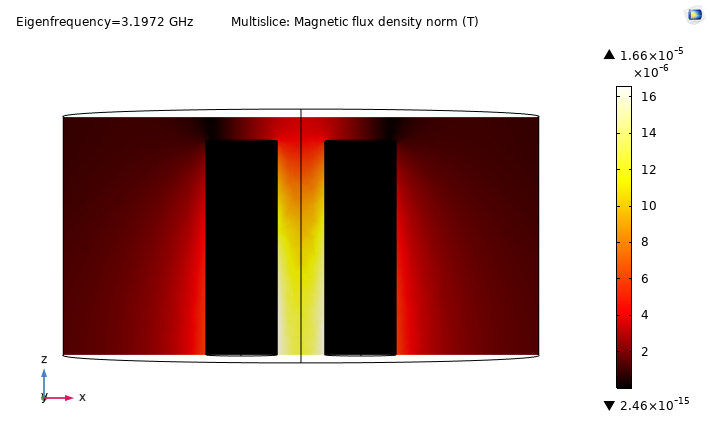


Through simulation, we determine a quality factor of $2x10^{4}$ and mode volume of $3.47x10^{-7}m^{3}$.

### Power Scaling

#### Linear Scaling

In [34]:
from matplotlib.colors import LogNorm

P_per_NV = 8/(3e-3*3e-3*0.9e-3*(4 * 3.51 / 12.01 * 6.022e23))

rho_list = np.logspace(-3, 5, 100)
r1 = np.logspace(-3.5, 3, 100)
Vd = 3e-3 * 3e-3 * 0.9e-3   # diamond volume
V0list = Vd * r1  
powers_lin = np.zeros((len(V0list), len(rho_list)))

for ii in range(len(r1)):
    V0 = V0list[ii]   # diamond volume
    for jj in range(len(rho_list)):
        rho = rho_list[jj]
        power = P_per_NV * V0 * (rho * 3.51 / 12.01 * 6.022e23)
        powers_lin[ii, jj] = power

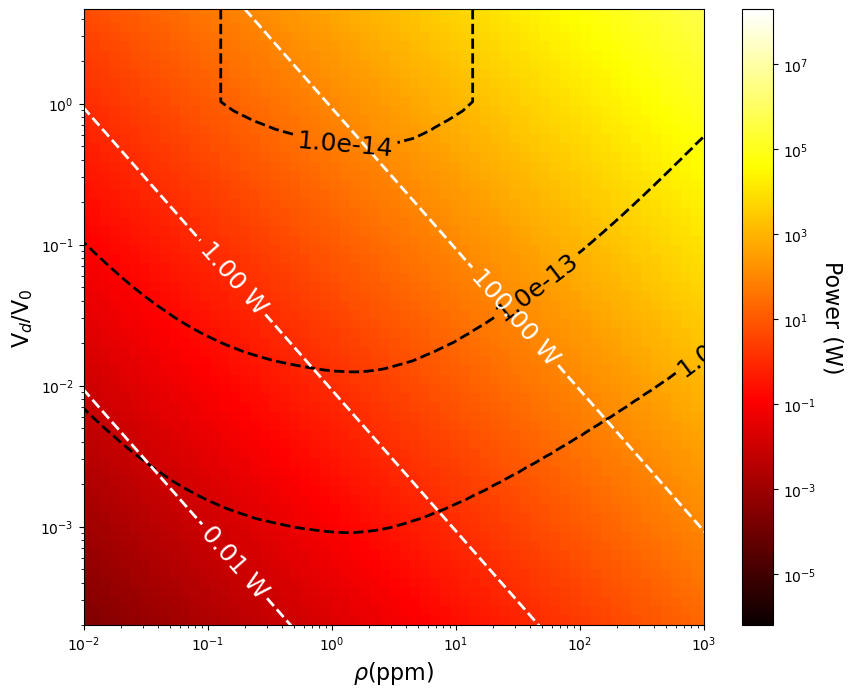

In [35]:
# This cell relies on running the Sensitivity Optimization over Diamond Volume and NV Density code
# This shows how power scales linearly with the number of NVs, assuming a standard of 8W for our current 
# experimental setup

# Create the figure
plt.figure(figsize=(10, 8))

# Calculate rr2 and set the image plot
rr2 = rho_list * 4
mu0 = 4 * np.pi * 1e-7
energy = 6.626e-34 * 2.87e9   # h * f
gs = 0.019   # single coupling strength  
V = 1 * energy / 3 / gs**2 * (28e9)**2 * mu0  # 2/3 due to the geometry factor
rr1 = V0list / V

# Create a meshgrid for rr2 and rr1
RR2, RR1 = np.meshgrid(rr2, rr1)

# Plot the data using pcolormesh
plt.pcolormesh(RR2, RR1, powers_lin, shading='auto', norm=LogNorm(vmin=np.min(powers_lin), vmax=np.max(powers_lin)), cmap='hot')

# Set scales to log
plt.xscale('log')
plt.yscale('log')

# Add color bar and label it
cbar = plt.colorbar()
cbar.set_label('Power (W)', rotation=270, labelpad=20, fontsize=16)

# Set axis labels and limits
plt.xlabel(r'$\rho$(ppm)', fontsize=16)
plt.ylabel(r'V$_{d}$/V$_{0}$', fontsize=16)
plt.xlim([1e-2, 1e3])
plt.ylim([2e-4, 4.68])

# Generate contour levels
contour_levels = [2e-15, 1e-14, 1e-13, 1e-12]
contour = plt.contour(RR2, RR1, sens_Vd_rho, levels=contour_levels, colors='black', linewidths=2, linestyles='--')
plt.clabel(contour, inline=True, fontsize=18, fmt='%.1e', colors='black')

# Generate contour levels
contour_levels = [1e-2, 1e0, 1e2]
contour = plt.contour(RR2, RR1, powers_lin, levels=contour_levels, colors='white', linewidths=2, linestyles='--')
plt.clabel(contour, inline=True, fontsize=18, fmt=lambda x: f'{x:.2f} W', colors='white')

# plt.text(1, 0.0004, r'1 pT/$\sqrt{Hz}$', fontsize=18, color='black')
# plt.text(60, 0.0035, r'100 fT/$\sqrt{Hz}$', fontsize=18, color='black')
# plt.text(80, 0.035, r'10 fT/$\sqrt{Hz}$', fontsize=18, color='black')
# plt.text(100, 0.2, r'2 fT/$\sqrt{Hz}$', fontsize=18, color='black')


# Show the plot
plt.show()

This shows how power scales with sensitivity in the current setup we have with our dielectric resonator.

### Power Optimization

In [36]:
def min_power_linear(max_sens, V, Q, gammao, PowerList, vot, energy, gs, kc, kc1):
    """
    Locate the minimum power that can achieve some sensitivity value max_sense or better based on linear scaling
    of optical power with number of NVs. This is based on our current setup which uses 8W with a 3x3x0.9mm diamond 
    and 4ppm NV density. Diamond volume and NV density are the parameters optimized over.
    """
    
    # Our current setup has 8W with a 3x3x0.9mm diamond and 4ppm NV density
    P_per_NV = 8/(3e-3*3e-3*0.9e-3*(4 * 3.51 / 12.01 * 6.022e23)) 
    rholist = np.logspace(-2,2,50)
    Vdlist = np.logspace(-3,3,50) * 3e-3*3e-3*0.9e-3
    powers = []
    Vds = []
    rhos = []
    for i in range(len(Vdlist)):
        Vd=Vdlist[i]
        for j in range(len(rholist)):
            rho=rholist[j]
            rhomax = 0.1231 * 4 * 1e-6 / Vd
            if rho>rhomax:
                continue
            sensi = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)
            if sensi < max_sens:
                power = P_per_NV * Vd * (rho * 3.51 / 12.01 * 6.022e23) 
                powers.append(power)
                Vds.append(Vd)
                rhos.append(rho)
    if not powers:
        return [None, None, None]
    min_index = powers.index(min(powers))
    return [powers[min_index], Vds[min_index], rhos[min_index]]
            
    

##### Current Experimental Setup

In [101]:
import numpy as np
# Compute sensitivity and power with our current experimental setup's parameters

P_per_NV = 8/(3e-3*3e-3*0.9e-3*(4 * 3.51 / 12.01 * 6.022e23))
Q = 2.2e4
V = 1.7 / (100**3)
omega = 2.87e9
w = 3e-3
L = 9e-4
Vd = w*w*L
rho = 4
alpha = 0.45 * 100 *rho/0.1
I=18800
gammao = 2*(270+0.38*I)*(90+0.58*I)/(270+1.08*I)
PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * omega   #h*omega
gs = np.sqrt(energy * (28e9)**2 * mu0 / 3 / V)   #single coupling strength
Gamma = 330e3/4 *rho
kc0 = 130e3   # cavity linewidth
kc1 = 130e3   # cavity loop coupling
kc = kc0 + kc1   # cavity loss

rhomax = 0.1231 * 4 * 1e-6 / Vd
if rho>rhomax:
    rho=rhomax

current_sensitivity = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)
print(f'Sensitivity with current experimental setup: {current_sensitivity:.2e}')
current_power = P_per_NV * (Vd*(rho * 3.51 / 12.01 * 6.022e23))
print(f'Power used with current experimental setup: {current_power:.2e} W')
power_100fT, Vd_100fT, rho_100fT = min_power_linear(100e-15, V, Q, gammao, PowerList, vot, energy, gs, kc, kc1)
print(f'Power needed to reach 100fT sensitivity with current experimental setup: {power_100fT:.2e} W')
print(f'At this optimal point: Diamond Volume: {Vd_100fT:.2e} m^3   NV Density: {rho_100fT:.3f} ppm')

Sensitivity with current experimental setup: 2.80e-13
Power used with current experimental setup: 8.00e+00 W
Power needed to reach 100fT sensitivity with current experimental setup: 8.19e-01 W
At this optimal point: Diamond Volume: 1.56e-07 m^3   NV Density: 0.021 ppm


##### Power Optimization

#### NOTE: This next three cells are commented out because this process takes a long time to run

In [41]:
# See what the minimum power is to reach some sensitivity value or better (100fT/sqrt(Hz) in this case)
# for different combinations of mode volume and quality factor

# Qlist = np.logspace(2, 6, 101)   #quality factor
# PowerList = np.linspace(-70, 20, 51)
# vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
# Vd_ref = 3e-3 * 3e-3 * 0.9e-3   #diamond volume for reference
# Vlist = Vd_ref * np.logspace(-6, 4, 101)   #cavity mode volume
# mu0 = 4 * np.pi * 1e-7   
# omega = 2.87e9
# energy = 6.626e-34 * omega   #h*omega
# I=18800
# gammao = 2*(270+0.38*I)*(90+0.58*I)/(270+1.08*I)

# max_sens = 100e-15

# sens_args = np.zeros((len(Vlist), len(Qlist)), dtype=object)
# opt_power_lin = np.zeros((len(Vlist), len(Qlist)))
# for i in range(len(Vlist)):
#     V=Vlist[i]
#     gs = np.sqrt(energy * (28e9)**2 * mu0 / 3 / V)   #single coupling strength
#     for j in range(len(Qlist)):
#         Q=Qlist[j]
#         kc0 = omega / Q   # cavity linewidth
#         kc1 = kc0    # cavity loop coupling
#         kc = kc0 + kc1   # cavity loss
#         power, Vd, rho =  min_power_linear(max_sens, V, Q, gammao, PowerList, vot, energy, gs, kc, kc1)
#         opt_power_lin[i,j] = power
#         sens_args[i,j] = np.array([Vd,rho])

KeyboardInterrupt: 

In [54]:
# %store opt_power_lin sens_args

Stored 'opt_power_lin' (ndarray)
Stored 'sens_args' (ndarray)


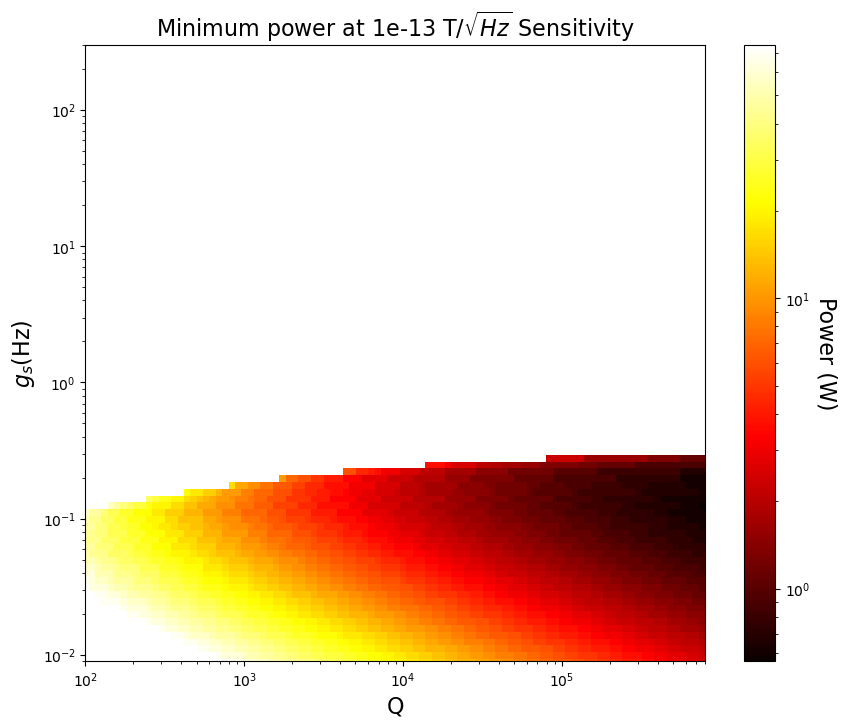

In [55]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm

# X, Y = np.meshgrid(Qlist, np.sqrt(energy * (28e9)**2 * mu0 / 3 / Vlist))
# plt.figure(figsize=(10, 8))
# plt.pcolormesh(X,Y, opt_power_lin, shading='auto', norm=LogNorm(), cmap='hot')

# # Add color bar and label it
# cbar = plt.colorbar()
# cbar.set_label('Power (W)', rotation=270, labelpad=20, fontsize=16)

# # contour = plt.contour(X,Y, sensitivity, levels=[1.3e-14, 1e-13, 1e-12, 1e-11], colors='w', linewidths=2)

# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([1e2, 8e5])
# plt.ylim([9e-3, 300])
# plt.title(f'Minimum power at {max_sens} T/$\sqrt{{Hz}}$ Sensitivity', fontsize=16)
# plt.ylabel(r'$g_{s}$(Hz)', fontsize=16)
# plt.xlabel('Q', fontsize=16)

# plt.show()

#### A more rigorous method

In [78]:
from scipy.optimize import minimize, shgo, differential_evolution, dual_annealing
import numpy as np
import pandas as pd

def minimize_power_single(max_sens, omega, V, Q, kc0=None, kc1=None, w_bound=1e-1, n=1000, L=0.9e-3):
    """
    This is a more rigorous model of minimizing optical power to achieve some sensitivity max_sens. We
    fix diamond length and optimize over dimaond area, NV density, and effective optical polarization rate
    gammao, which is related to excitation rate and optical intensity.
    """

    # Constants and parameters
    mu0 = 4 * np.pi * 1e-7
    energy = 6.626e-34 * omega
    absorp_cs = 8e-17 / (100**2)  # NV absorption cross section
    gs = np.sqrt(energy * (28e9)**2 * mu0 / 3 / V)
    if kc0 is None:
        kc0 = omega / Q
    if kc1 is None:
        kc1 = kc0
    kc = kc0 + kc1
    L = L #diamond length
    PowerList = np.linspace(-70, 20, 51)
    vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)

    # Bounds for variables
    gammao_bounds = (0.3e3, 10e3)   # Optical polarization rate bounds
    w_bounds = (1e-4, w_bound)         # Diamond width bounds
    rho_bounds = (1e-2, 4)           # NV density bounds

    bounds = [gammao_bounds, w_bounds, rho_bounds]

    # Objective function
    def objective(x):
        gammao, w, rho = x
        gamma_th = 90 # thermal relxation rate
        I = 1.225 * gammao - 4.809 * gamma_th + 3.085 * np.sqrt(0.1577 * gammao**2 - 0.5229 * gammao * gamma_th + gamma_th**2)
        power = w * w * (6.626e-34*(3e8/532e-9)) * I / absorp_cs 
        return power

    # Constraint: Sensitivity must be less than or equal to max_sens
    def constraint_sens(x):
        gammao, w, rho = x
        Vd = w*w*L 
        sens = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)
        return max_sens - sens  # Ensure sens <= max_sens

    constraints = [{'type': 'ineq', 'fun': constraint_sens}]

    # Use a global optimizer to find the minimum power
    res = shgo(objective, bounds, constraints=constraints, n=n)

    if res.success:
        min_power = res.fun
        min_params = res.x
        return min_power, min_params
    else:
        return np.inf, [0, 0, 0]

def minimize_power_VQ(max_sens, omega, Vlist, Qlist):
    # Find the minimum power over a range of Vs and Qs
    opt_power = np.zeros((len(Vlist), len(Qlist)))
    sens_args = np.zeros((len(Vlist), len(Qlist)), dtype=object)

    for ii, V in enumerate(Vlist):
        for jj, Q in enumerate(Qlist):
            min_power, min_params = minimize_power_single(max_sens, omega, V, Q)
            opt_power[ii, jj] = min_power
            sens_args[ii, jj] = min_params

    return opt_power, sens_args


##### Current Experimental Setup

In [103]:
import numpy as np
# Compute sensitivity and power with our current experimental setup's parameters

Q = 2.2e4
V = 1.7 / (100**3)
omega = 2.87e9
absorp_cs = 8e-17 / (100**2)
w = 3e-3
L = 9e-4
Vd = w*w*L
rho = 4
alpha = 0.45 * 100 * (rho/0.1)
PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * omega   #h*omega
gs = np.sqrt(energy * (28e9)**2 * mu0 / 3 / V)   #single coupling strength
Gamma = 330e3/4 *rho
kc0 = 130e3   # cavity linewidth
kc1 = 130e3   # cavity loop coupling
kc = kc0 + kc1   # cavity loss
gamma_th = 90 # thermal relxation rate
I=18800
gammao = 2*(270+0.38*I)*(90+0.58*I)/(270+1.08*I)

rhomax = 0.1231 * 4 * 1e-6 / Vd
if rho>rhomax:
    rho=rhomax

current_sensitivity = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)
print(f'Sensitivity with current experimental setup: {current_sensitivity:.2e}')
current_power = w * w * (6.626e-34*(3e8/532e-9)) * I / absorp_cs 
print(f'Power used with current experimental setup: {current_power:.2e} W')
current_power_100fT, sens_args_current_100fT = minimize_power_single(100e-15, omega, V, Q, kc0=kc0, kc1=kc1)
print(f'Power needed to reach 100fT sensitivity with current experimental setup: {current_power_100fT:.2e}')
print(f'At this optimal point: Diamond Volume: {(L*sens_args_current_100fT[1]**2):.2e} m^3  '
      f'NV Density: {sens_args_current_100fT[2]:.3f} ppm  '
      f'Optical Excitation Rate: {sens_args_current_100fT[0]:.3f} Hz')

Sensitivity with current experimental setup: 2.80e-13
Power used with current experimental setup: 7.90e+00 W
Power needed to reach 100fT sensitivity with current experimental setup: 9.40e-01
At this optimal point: Diamond Volume: 8.48e-08 m^3  NV Density: 0.031 ppm  Optical Excitation Rate: 300.000 Hz


##### Power Optimization

#### NOTE: This next three cells are commented out because this process takes a long time to run

In [148]:
# import numpy as np
# import time
# # Find minimum power to reach 100fT/sqrt(Hz) for different V and Q values
# # NOTE: This cell takes a long time to run, consider saving data that it produces
# Qlist = np.logspace(2, 6, 101)   #quality factor
# Vd_ref = 3e-3 * 3e-3 * 0.9e-3   #diamond volume for reference
# Vlist = Vd_ref * np.logspace(-6, 4, 101)   #cavity mode volume
# omega = 2.87e9
# max_sens = 1e-13
# power_100fT,sens_args_100fT = minimize_power_VQ(max_sens, omega, Vlist, Qlist)

In [149]:
# %store power_100fT sens_args_100fT

Stored 'power_100fT' (ndarray)
Stored 'sens_args_100fT' (ndarray)


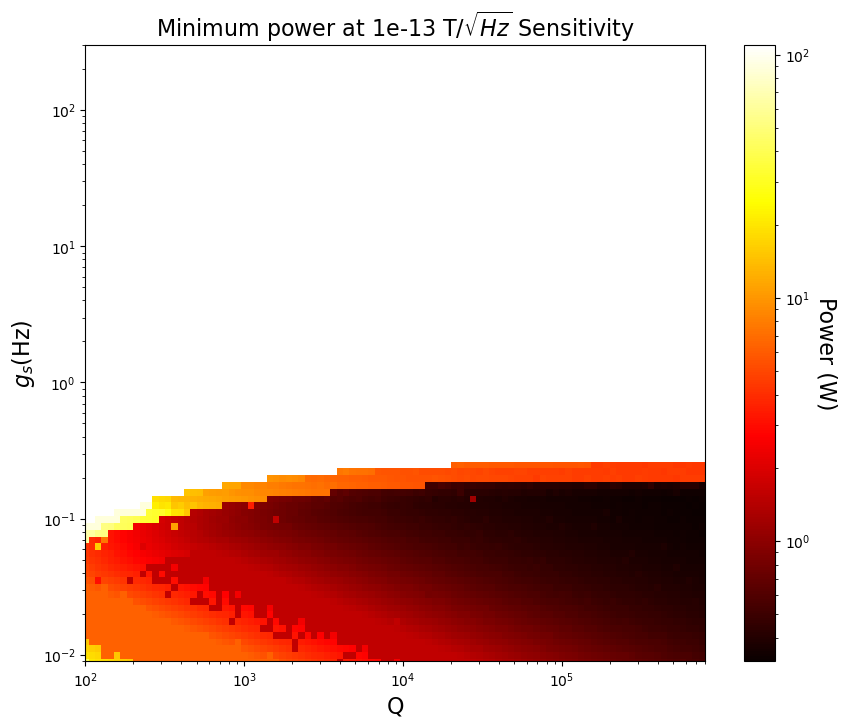

In [150]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm

# Qlist = np.logspace(2, 6, 101)   #quality factor
# omega = 2.87e9
# Vd_ref = 3e-3 * 3e-3 * 0.9e-3   #diamond volume for reference
# Vlist = Vd_ref * np.logspace(-6, 4, 101)   #cavity mode volume
# mu0 = 4 * np.pi * 1e-7   
# energy = 6.626e-34 * omega   #h*omega

# X, Y = np.meshgrid(Qlist, np.sqrt(energy * (28e9)**2 * mu0 / 3 / Vlist))
# plt.figure(figsize=(10, 8))
# plt.pcolormesh(X,Y, power_100fT, shading='auto', norm=LogNorm(), cmap='hot')

# # Add color bar and label it
# cbar = plt.colorbar()
# cbar.set_label('Power (W)', rotation=270, labelpad=20, fontsize=16)

# # contour = plt.contour(X,Y, sensitivity, levels=[1.3e-14, 1e-13, 1e-12, 1e-11], colors='w', linewidths=2)

# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([1e2, 8e5])
# plt.ylim([9e-3, 300])
# plt.title(f'Minimum power at {max_sens} T/$\sqrt{{Hz}}$ Sensitivity', fontsize=16)
# plt.ylabel(r'$g_{s}$(Hz)', fontsize=16)
# plt.xlabel('Q', fontsize=16)

# plt.show()

Intuition gathered from this plot is that as mode volume decreases, and thus single coupling strength increases, we can adjust diamond dimensions to make the diamond smaller while still getting near a near unity fill factor. This means there are fewer spins and a smaller diamond to illuminate, resulting in lower optical power requirements. This particular model assumes that diamond length is held constant while diamond cross section is variable. The effective optical polarization rate is also variable, which relates to the intensity of laser used and thus power.

#### Power Optimized over Diamond Parameters with Current Resonator

In [44]:
rho_list = np.logspace(-3, 5, 100)
Vdlist = np.logspace(-3,3,50) * 3e-3*3e-3*0.9e-3
P_per_NV = 8/(3e-3*3e-3*0.9e-3*(4 * 3.51 / 12.01 * 6.022e23))
Q = 2.2e4
V = 1.7 / (100**3)
omega = 2.87e9
I=18800
gammao = 2*(270+0.38*I)*(90+0.58*I)/(270+1.08*I)
PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * omega   #h*omega
gs = np.sqrt(energy * (28e9)**2 * mu0 / 3 / V)   #single coupling strength
kc0 = 130e3   # cavity linewidth
kc1 = 130e3   # cavity loop coupling
kc = kc0 + kc1   # cavity loss

strings= ['50','100','500']
max_sens_values = [50e-15,100e-15, 500e-15]
p50 = np.zeros(len(rho_list))
p100 = np.zeros(len(rho_list))
p500 = np.zeros(len(rho_list))
powers = {'50':np.zeros(len(rho_list)), '100':np.zeros(len(rho_list)),'500':np.zeros(len(rho_list)),}

for i in range(3):
    max_sens=max_sens_values[i]
    string = strings[i]
    for j in range(len(rho_list)):
        rho=rho_list[j]
        powers_j = []
        for k in range(len(Vdlist)):
            Vd=Vdlist[k]
            rhomax = 0.1231 * 4 * 1e-6 / Vd
            if rho>rhomax:
                continue
            sensi = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)
            if sensi < max_sens:
                power = P_per_NV * Vd * (rho * 3.51 / 12.01 * 6.022e23) 
                powers_j.append(power)
        if not powers_j:
            powers[string][j] = 0
        else:
            powers[string][j] = min(powers_j)



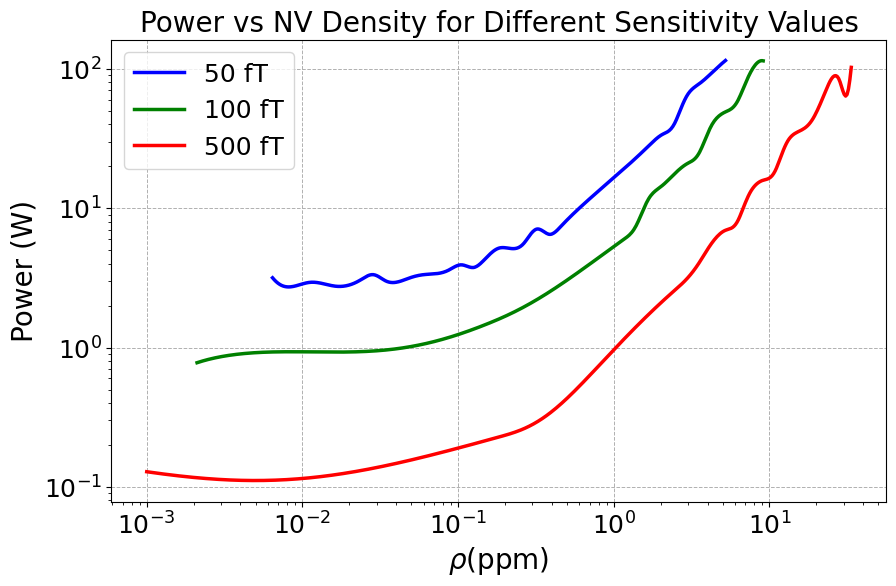

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

# Assuming rho_list is already defined
plt.figure(figsize=(10, 6))

# Function to filter non-zero values
def filter_non_zero(rho_list, power_values):
    filtered_rho = [rho for rho, power in zip(rho_list, power_values) if power > 0]
    filtered_power = [power for power in power_values if power > 0]
    return filtered_rho, filtered_power

# Plot each of the power arrays with non-zero values and smooth curves
for string, color in zip(['50', '100', '500'], ['blue', 'green', 'red']):
    filtered_rho, filtered_power = filter_non_zero(rho_list, powers[string])
    
    # Fit a smoother curve using UnivariateSpline with a higher smoothing factor
    spline = UnivariateSpline(np.log(filtered_rho), filtered_power, s=1.0)  # Increased s for smoother curve
    smooth_rho = np.logspace(np.log10(min(filtered_rho)), np.log10(max(filtered_rho)), 500)
    smooth_power = spline(np.log(smooth_rho))
    
    # Plot the smooth curve with increased line weight
    plt.plot(smooth_rho, smooth_power, label=f'{string} fT', color=color, linewidth=2.5)  # Increased linewidth

# Set axes to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and legend with increased font size
plt.xlabel(r'$\rho$(ppm)', fontsize=20)
plt.ylabel('Power (W)', fontsize=20)
plt.title('Power vs NV Density for Different Sensitivity Values', fontsize=20)
plt.legend(fontsize=18)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)  # Major tick labels

# Configure grid to show only at major ticks
plt.grid(True, which="major", linestyle="--", linewidth=0.7)

# Display the plot
plt.show()


#### Power Optimized over Cavity Design and Diamond Parameters

In [108]:
import numpy as np

# Define the quality factors and cavity mode volumes
Qlist = np.logspace(3, 6, 30)   # Quality factor ranging from 1e3 to 1e6
omega = 2.87e9                   # Angular frequency in rad/s
Vd_ref = 3e-3 * 3e-3 * 0.9e-3   # Reference diamond volume in m^3
Vlist = Vd_ref * np.logspace(-6, 4, 30)   # Cavity mode volume ranging from Vd_ref*1e-6 to Vd_ref*1e4

# Physical constants
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * omega   # h*omega

# other parameters
PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
kc0 = 130e3   # Cavity linewidth in Hz
kc1 = 130e3   # Cavity loop coupling in Hz
kc = kc0 + kc1 # Total cavity loss in Hz
L=0.9e-3

# Initialize dictionaries to store minimum powers and associated parameters
strings = ['50', '100']
max_sens_values = [50e-15, 100e-15]
powers = {'50': np.full(len(Qlist), np.inf), '100': np.full(len(Qlist), np.inf)}
params_powers = {'50': [None]*len(Qlist), '100': [None]*len(Qlist)}
V_powers = {'50': [None]*len(Qlist), '100': [None]*len(Qlist)}  # To store mode volumes

# Loop over each sensitivity level
for i in range(2):
    max_sens = max_sens_values[i]
    string = strings[i]

    # Loop over each quality factor
    for j in range(len(Qlist)):
        Q = Qlist[j]
        powers_j = []
        params_j = []
        V_j = []
        
        # Loop over each cavity mode volume
        for k in range(len(Vlist)):
            V = Vlist[k]
            power, params = minimize_power_single(max_sens, omega, V, Q, n=100, L=L)
            
            # Check if the computed power is finite
            if np.isfinite(power):
                powers_j.append(power)
                params_j.append(params)
                V_j.append(V)
        
        # Determine the minimum power and store it along with associated params
        if powers_j:
            min_power = min(powers_j)
            min_index = powers_j.index(min_power)
            powers[string][j] = min_power
            params_powers[string][j] = params_j[min_index]
            V_powers[string][j] = V_j[min_index]
        else:
            # If no finite power was found, keep the default value (np.inf) and params as None
            powers[string][j] = np.inf
            params_powers[string][j] = None
            V_powers[string][j] = None

# Optional: Convert np.inf to 0 for powers where no finite power was found
for string in strings:
    powers[string][powers[string] == np.inf] = 0


In [117]:
import numpy as np
from IPython.display import display, Latex

# Desired Q value
target_Q = 7650

# Function to find the index of the closest Q value
def find_closest_Q(Qlist, target):
    return np.argmin(np.abs(Qlist - target))

# Find the index of Q closest to 7650
closest_index = find_closest_Q(Qlist, target_Q)
closest_Q = Qlist[closest_index]

# Iterate over each sensitivity to retrieve and display the information
string = '100'
power = powers[string][closest_index]
params = params_powers[string][closest_index]
V = V_powers[string][closest_index]

# Check if a valid power and params were found
if power > 0 and params is not None:
    gammao = params[0]
    w = params[1] 
    rho = params[2]
    Vd = w * w * L

    # Prepare LaTeX-formatted display
    display(Latex(f"The following parameters are roughly optimal for a target Q of {target_Q}"))
    display(Latex(f"Sensitivity: {string} $fT/\sqrt(Hz)$ "))
    display(Latex(f"Mode Volume (V): {V:.2e} m$^3$ "))
    display(Latex(f"Diamond Volume (Vd): {Vd:.2e} m$^3$"))
    display(Latex(f"NV Density: {rho:.3f} ppm "))
    display(Latex(f"Minimum Power: {power * 1e3:.0f} mW"))
else:
    display(Latex(
        f"Sensitivity {string} fT $\newline$"
        f"No valid power and parameters found for Q = {closest_Q:.0f}."
    ))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

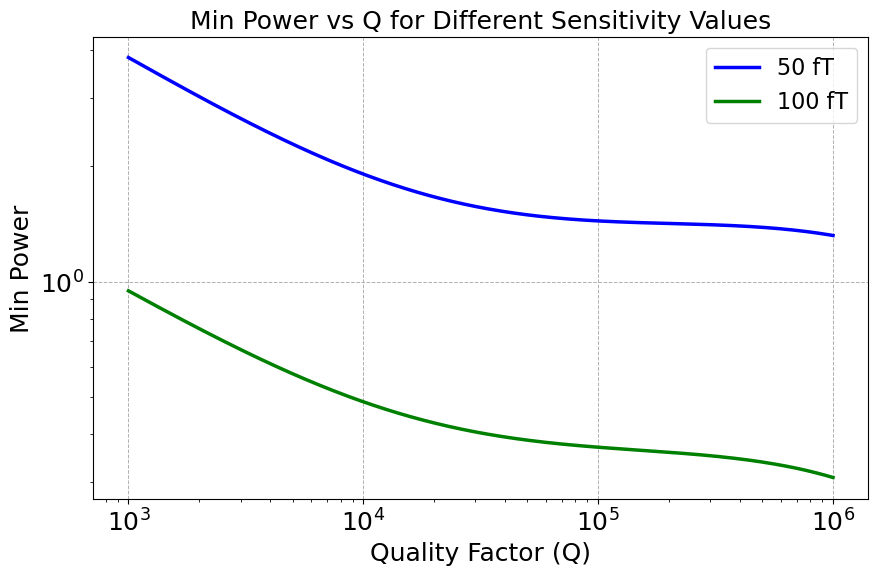

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

# Assuming Qlist and other variables are already defined
plt.figure(figsize=(10, 6))

# Function to filter non-zero values
def filter_non_zero(Qlist, power_values):
    filtered_Q = [Q for Q, power in zip(Qlist, power_values) if power > 0]
    filtered_power = [power for power in power_values if power > 0]
    return filtered_Q, filtered_power

# Plot only the power arrays for 50 fT and 100 fT
for string, color in zip(['50', '100'], ['blue', 'green']):
    filtered_Q, filtered_power = filter_non_zero(Qlist, powers[string])
    
    # Plot the original data
#     plt.scatter(filtered_Q, filtered_power, label=f'{string} fT (Original)', color=color, alpha=0.5)
    if color =='blue':
        smooth_f = 10 
    else:
        smooth_f = 1
    
    # Fit a smoother curve using UnivariateSpline
    spline = UnivariateSpline(np.log(filtered_Q), filtered_power, s=smooth_f)
    smooth_Q = np.logspace(np.log10(min(filtered_Q)), np.log10(max(filtered_Q)), 500)
    smooth_power = spline(np.log(smooth_Q))
    
    # Plot the smooth curve with increased line weight
    plt.plot(smooth_Q, smooth_power, label=f'{string} fT', color=color, linewidth=2.5)

# Set axes to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and legend with increased font size
plt.xlabel('Quality Factor (Q)', fontsize=18)
plt.ylabel('Min Power', fontsize=18)
plt.title('Min Power vs Q for Different Sensitivity Values', fontsize=18)
plt.legend(fontsize=16)

# Configure grid to show only at major ticks
plt.grid(True, which="major", linestyle="--", linewidth=0.7)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)  # Major tick labels

# Display the plot
plt.show()



In [121]:
import numpy as np

# Define constants and parameters
Q = 7650  # Fixed Quality factor
omega = 2.87e9
Vd_ref = 3e-3 * 3e-3 * 0.9e-3   # Reference diamond volume in m^3
Vlist = Vd_ref * np.logspace(-6, 4, 30)   # Cavity mode volume ranging from Vd_ref*1e-6 to Vd_ref*1e4
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * omega   # h*omega
I = 18800
gammao = 2*(270 + 0.38*I)*(90 + 0.58*I)/(270 + 1.08*I)
PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
kc0 = 130e3   # Cavity linewidth in Hz
kc1 = 130e3   # Cavity loop coupling in Hz
kc = kc0 + kc1   # Total cavity loss in Hz

# Define sensitivities and corresponding string labels
strings = ['50', '100', '500']
max_sens_values = [50e-15, 100e-15, 500e-15]

# Initialize dictionaries to store minimum powers and associated parameters
powers = {'50': np.full(len(Vlist), np.inf),'100': np.full(len(Vlist), np.inf),'500': np.full(len(Vlist), np.inf)}
Vd_powers = {'50': [None] * len(Vlist),'100': [None] * len(Vlist),'500': [None] * len(Vlist)}
rho_powers = {'50': [None] * len(Vlist),'100': [None] * len(Vlist),'500': [None] * len(Vlist)}

# Loop over each sensitivity level
for i in range(len(strings)):
    max_sens = max_sens_values[i]
    string = strings[i]
    
    # Loop over each cavity mode volume
    for j in range(len(Vlist)):
        V = Vlist[j]
        gs = np.sqrt(energy * (28e9)**2 * mu0 / 3 / V)   # Single coupling strength
        
        # Call the power minimization function
        p_opt, Vd_opt, rho_opt = min_power_linear(
            max_sens, V, Q, gammao, PowerList, vot, energy, gs, kc, kc1
        )
        
        # Check if a valid power was returned
        if p_opt:
            powers[string][j] = p_opt
            Vd_powers[string][j] = Vd_opt
            rho_powers[string][j] = rho_opt
        else:
            # If no valid power was found, set power to 0 and params to None
            powers[string][j] = 0
            Vd_powers[string][j] = None
            rho_powers[string][j] = None


In [122]:
import numpy as np
from IPython.display import display, Latex

# Fixed Quality factor
target_Q = 7650
string = '100'

# Retrieve the array 
power_array = powers[string]
Vd_array = Vd_powers[string]
rho_array = rho_powers[string]

# Function to find the index of the minimum power (excluding zeros)
def find_min_power_index(powers_array):
    # Consider only powers greater than 0 to exclude invalid entries
    valid_indices = np.where(powers_array > 0)[0]
    if len(valid_indices) == 0:
        return None  # No valid power found
    min_power_idx = valid_indices[np.argmin(powers_array[valid_indices])]
    return min_power_idx

# Find the index of the minimum power for sensitivity '100'
min_idx = find_min_power_index(power_array)

if min_idx is not None:
    min_power = power_array[min_idx]
    Vd_opt = Vd_array[min_idx]
    rho_opt = rho_array[min_idx]
    V_opt = Vlist[min_idx]
    
    # Prepare LaTeX-formatted display
    display(Latex(f"The following parameters are roughly optimal for a target Q of {target_Q}:"))
    display(Latex(f"Sensitivity: {string} $fT/\\sqrt{{Hz}}$"))
    display(Latex(f"Mode Volume (V): {V_opt:.2e} m$^3$"))
    display(Latex(f"Diamond Volume (Vd): {Vd_opt:.2e} m$^3$"))
    display(Latex(f"NV Density: {rho_opt:.3f} ppm"))
    display(Latex(f"Minimum Power: {min_power * 1e3:.0f} mW"))
else:
    display(Latex(
        f"Sensitivity {string} fT \\newline "
        f"No valid power and parameters found for Q = {Q}."
    ))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

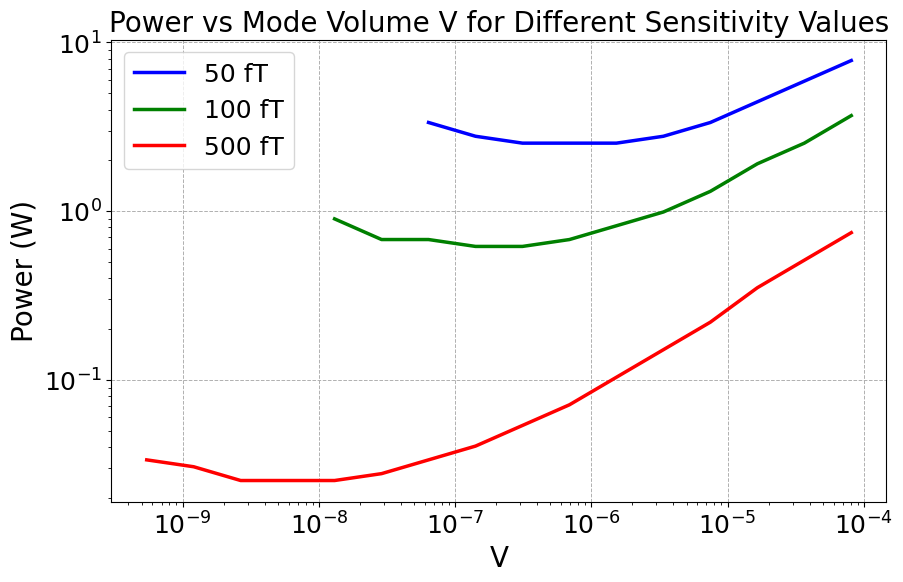

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Vlist, powers, and other variables are already defined
plt.figure(figsize=(10, 6))

# Function to filter non-zero values
def filter_non_zero(Vlist, power_values):
    filtered_V = [V for V, power in zip(Vlist, power_values) if power > 0]
#     print(filtered_V)
    filtered_power = [power for power in power_values if power > 0]
    return filtered_V, filtered_power

# Define the colors for the three sensitivity values: 50 (blue), 100 (green), and 500 (red)
colors = {'50': 'blue', '100': 'green', '500': 'red'}

# Plot for all three sensitivity values without smoothing
for string, color in colors.items():
    filtered_V, filtered_power = filter_non_zero(Vlist, powers[string])
    
    # Plot the raw data points without smoothing
    plt.plot(filtered_V, filtered_power, label=f'{string} fT', color=color, linewidth=2.5)

# Set axes to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and legend with increased font size
plt.xlabel('V', fontsize=20)
plt.ylabel('Power (W)', fontsize=20)
plt.title('Power vs Mode Volume V for Different Sensitivity Values', fontsize=20)
plt.legend(fontsize=18)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)  # Major tick labels

# Configure grid to show only at major ticks
plt.grid(True, which="major", linestyle="--", linewidth=0.7)

# Display the plot
plt.show()

##### Parameter Selection

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display, Latex
%matplotlib inline
def max_L(gammao, alpha, absorp_cs, I_min):
    I_in = (6.626e-34*(3e8/532e-9))*gammao/absorp_cs
    return -(1/alpha)*np.log(I_min/I_in)

cavity_dict = {'Dielectric': [1.7 / (100**3), 2.2e4],
              'Double Reentrance': [3.47e-7, 2e4],
              'Tapered Double Reentrance': [5.717e-8, 7650]}
style = {'description_width': 'initial'}
rho_slider = widgets.FloatLogSlider(value=4,base=10, min=np.log10(1e-2), max=np.log10(1e2), step=0.01,description=r'NV density $\rho$ (ppm):', layout=widgets.Layout(width='500px'),style=style)
w_slider = widgets.FloatLogSlider(value=3, base=10, min=np.log10(1e-2), max=np.log10(1e2), step=0.01, description='Diamond Cross Section Width (mm):', layout=widgets.Layout(width='500px'), style=style)
gammao_slider = widgets.FloatSlider(value=7.9,min=0.3,max=10,step=0.1,description=r'Optical Polarization Rate $\gamma_{0}$ (kHz):', layout=widgets.Layout(width='500px'),style=style)

@widgets.interact_manual(
    cavity=['Dielectric', 'Double Reentrance', 'Tapered Double Reentrance'],
    rho_slider=rho_slider,w_slider=w_slider,gammao_slider=gammao_slider)

def interactive(cavity='Dielectric', rho_slider=4, w_slider = 3, gammao_slider = 7.924e3):
    V, Q = cavity_dict[cavity]
    gammao = gammao_slider*1e3
    w = w_slider*1e-3
    L = 0.9e-3
    PowerList = np.linspace(-70, 20, 51)
    vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
    Vd = w*w*L
    rhomax = 0.1231 * 4 * 1e-6 / Vd
    if rhomax<rho_slider:
        rho=rhomax
        display(Latex(f'Due to the optical polarization constraint ($\\rho_{{\\text{{max}}}}V_d=0.49 \\text{{ cm}}^3 \\text{{ ppm}}$), $\\rho$ has been reduced to ${rho:.2e}$ ppm'))
    else:
        rho=rho_slider
    mu0 = 4 * np.pi * 1e-7 
    omega = 2.87e9
    energy = 6.626e-34 * omega   #h*omega
    gs = np.sqrt(6.626e-34 * omega * (28e9)**2 * mu0 / 3 / V)   #single coupling strength
    kc0 = omega / Q   # cavity linewidth
    kc1 = kc0    # cavity loop coupling
    kc = kc0 + kc1   # cavity loss
    Gamma = 330e3 / 4 * rho
    alpha = 0.45 * 100  *rho/0.1
    
    sens_interact = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)

    absorp_cs = 8e-17 / (100**2)
    gamma_th = 90 # thermal relxation rate
    I = 1.225 * gammao - 4.809 * gamma_th + 3.085 * np.sqrt(0.1577 * gammao**2 - 0.5229 * gammao * gamma_th + gamma_th**2)
    power = w * w * (6.626e-34*(3e8/532e-9))*I/absorp_cs

    display(Latex(f"Cavity Mode Volume: {V:.2e} m$^3$, Diamond Volume: {Vd:.2e} m$^3$"))
    display(Latex(f'$\\textbf{{Sensitivity}}$: ${sens_interact:.2e}$'))
    display(Latex(f'$\\textbf{{Power}}$: ${power:.2e}$ W'))
    


interactive(children=(Dropdown(description='cavity', options=('Dielectric', 'Double Reentrance', 'Tapered Doub…

### High Frequency

##### Sensitivity Improvements at High Frequency

In [63]:
w = 3e-3
L = 0.9e-3
Vd = w*w*L
V = 1.7/(100**3)
Q = 2.2e4
omega_s0 = 2.87e9
B_bias=np.logspace(-2,0,100)
omega_s = omega_s0 + 28e9*B_bias/np.sqrt(3)
scale_factor = omega_s0/omega_s
V_scaled = V * (scale_factor**3)

PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
rho = 10  # NV density in ppm
mu0 = 4 * np.pi * 1e-7   
energies = 6.626e-34 * omega_s   #h*omega
I=18800
gammao = 2*(270+0.38*I)*(90+0.58*I)/(270+1.08*I)
gss = np.sqrt(6.626e-34 * omega_s * (28e9)**2 * mu0 / 3 / V_scaled)   #single coupling strength
kc0s = omega_s / Q   # cavity linewidth
kc1s = kc0s    # cavity loop coupling

sens_freq = []

for i in range(len(omega_s)):
    omega = omega_s[i]
    energy = energies[i]
    V = V_scaled[i]
    kc0 = kc0s[i]
    kc1 = kc1s[i]
    kc = kc0 + kc1
    gs = gss[i]
    sens_freq.append(compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd))

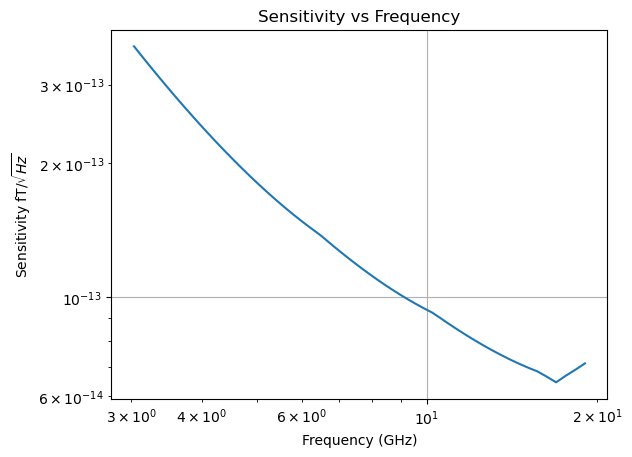

In [64]:
import matplotlib.pyplot as plt

ax = plt.axes() 
plt.plot(omega_s/1e9, sens_freq)
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'Sensitivity fT/$\sqrt{Hz}$')
plt.title('Sensitivity vs Frequency')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.show()

##### Power Reduction at High Frequency

#### First Power Model

In [131]:
# Computed with the first of the two models for computing and minimizing power (linear scaling model)
V = 1.7/(100**3)
Q = 2.2e4
omega_s0 = 2.87e9
omega_s = omega_s0 + np.logspace(-2,1.5,50)*1e9
scale_factor = omega_s0/omega_s
V_scaled = V * (scale_factor**3)

PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
mu0 = 4 * np.pi * 1e-7   
energies = 6.626e-34 * omega_s   #h*omega
gammao = 10e3  
gss = np.sqrt(6.626e-34 * omega_s * (28e9)**2 * mu0 / 3 / V_scaled)   #single coupling strength
kc0s = omega_s / Q   # cavity linewidth
kc1s = kc0s    # cavity loop coupling

opt_powers_model1 = np.zeros(len(omega_s))
args_model1 = []

for i in range(len(omega_s)):
    omega = omega_s[i]
    V = V_scaled[i]
    energy = energies[i]
    gs = gss[i]
    kc1 = kc1s[i]
    kc = 2*kc1
    opt_power, Vd, rho = min_power_linear(100e-15, V, Q, gammao, PowerList, vot, energy, gs, kc, kc1)
    opt_powers_model1[i] = opt_power
    args_model1.append([omega/1e9,opt_power,V,Vd,rho])

In [132]:
import numpy as np
from IPython.display import display, Latex

# Define target Q and sensitivity
target_Q = Q  # Q is already defined as 2.2e4 in the previous code
string = '100'  # Sensitivity in fT

# Extract frequencies from argss and find index closest to target
frequencies = [entry[0] for entry in args_model1]  # Frequencies in GHz
def find_closest_freq(frequencies, target):
    return np.argmin(np.abs(np.array(frequencies) - target))

# Function to find the index of the minimum power
def find_min_power(powers):
    return np.argmin(powers)

# Find index closest to 10 GHz
target_freq = 10  # GHz
idx_10ghz = find_closest_freq(frequencies, target_freq)
freq_10ghz = frequencies[idx_10ghz]

# Extract parameters for 10 GHz
power_10ghz = args_model1[idx_10ghz][1]
V_10ghz = args_model1[idx_10ghz][2]
Vd_10ghz = args_model1[idx_10ghz][3]
rho_10ghz = args_model1[idx_10ghz][4]

# Find index with minimum power
powers = [entry[1] for entry in argss]
idx_min_power = find_min_power(powers)
power_min = powers[idx_min_power]
V_min = args_model1[idx_min_power][2]
Vd_min = args_model1[idx_min_power][3]
rho_min = args_model1[idx_min_power][4]
freq_min_power = frequencies[idx_min_power]

# Display parameters for 10 GHz
display(Latex(f"The following parameters are roughly optimal for 10GHz and a Q of {target_Q:.0f}:"))
display(Latex(f"Sensitivity: {string} $fT/\\sqrt{{Hz}}$"))
display(Latex(f"Mode Volume (V): {V_10ghz:.2e} m$^3$"))
display(Latex(f"Diamond Volume (Vd): {Vd_10ghz:.2e} m$^3$"))
display(Latex(f"NV Density: {rho_10ghz:.3f} ppm"))
display(Latex(f"Minimum Power: {power_10ghz * 1e3:.0f} mW"))

# Display parameters for the frequency that minimizes power
display(Latex(f"\nThe following parameters are roughly optimal for a Q of {target_Q:.0f} at the frequency that minimizes power:"))
display(Latex(f"Sensitivity: {string} $fT/\\sqrt{{Hz}}$"))
display(Latex(f"Frequency: {freq_min_power:.2f} GHz"))
display(Latex(f"Mode Volume (V): {V_min:.2e} m$^3$"))
display(Latex(f"Diamond Volume (Vd): {Vd_min:.2e} m$^3$"))
display(Latex(f"NV Density: {rho_min:.3f} ppm"))
display(Latex(f"Minimum Power: {power_min * 1e3:.0f} mW"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

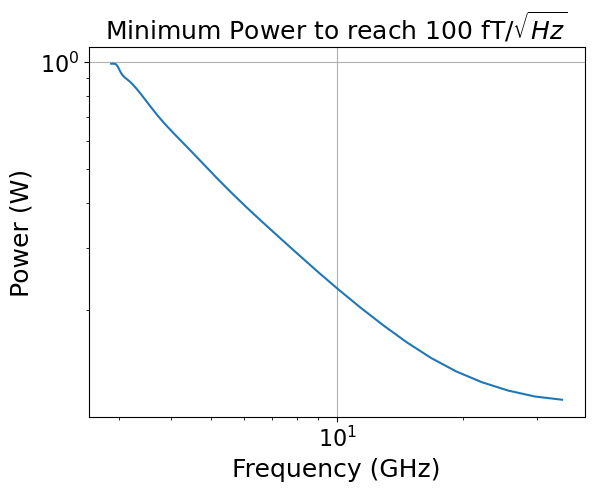

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Apply Gaussian smoothing to the power models
smoothed_opt_powers_model1 = gaussian_filter1d(opt_powers_model1, sigma=2)

# Plotting
ax = plt.axes()
plt.plot(omega_s / 1e9, smoothed_opt_powers_model1)
plt.xlabel('Frequency (GHz)', fontsize=18)
plt.ylabel('Power (W)', fontsize=18)
plt.title(r'Minimum Power to reach 100 fT/$\sqrt{Hz}$', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.grid()

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)  # Major tick labels

# plt.legend( fontsize=16)
plt.show()


#### Second Power Model

In [134]:
# Computed with the latter of the two models for computing and minimizing power
V = 1.7/(100**3)
Q = 2.2e4
omega_s0 = 2.87e9
omega_s = omega_s0 + np.logspace(-2,1.5,50)*1e9
scale_factor = omega_s0/omega_s
V_scaled = V * (scale_factor**3)

PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
mu0 = 4 * np.pi * 1e-7   
gss = np.sqrt(6.626e-34 * omega_s * (28e9)**2 * mu0 / 3 / V_scaled)   #single coupling strength
kc0s = omega_s / Q   # cavity linewidth
kc1s = kc0s    # cavity loop coupling

opt_powers_model2 = np.zeros(len(omega_s))
args_model_2 = []

for i in range(len(omega_s)):
    omega = omega_s[i]
    V = V_scaled[i]
    kc0 = kc0s[i]
    kc1 = kc1s[i]
    opt_power, args = minimize_power_single(100e-15, omega, V, Q, kc0=kc0, kc1=kc1, n=300)
    opt_powers_model2[i] = opt_power
    args_model_2.append(args)
    

In [139]:
import numpy as np
from IPython.display import display, Latex

# Define target Q and sensitivity
target_Q = Q  # Q is already defined as 2.2e4
string = '100'  # Sensitivity in fT

# Extract frequencies from omega_s and convert to GHz and find closest to target
frequencies = [omega / 1e9 for omega in omega_s]  # Frequencies in GHz
def find_closest_freq(frequencies, target):
    return np.argmin(np.abs(np.array(frequencies) - target))

# Function to find the index of the minimum power
def find_min_power(powers):
    return np.argmin(powers)

# Find index closest to 10 GHz
target_freq = 10  # GHz
idx_10ghz = find_closest_freq(frequencies, target_freq)
freq_10ghz = frequencies[idx_10ghz]

# Extract parameters for 10 GHz
power_10ghz = opt_powers_model2[idx_10ghz]
V_10ghz = V_scaled[idx_10ghz]
w_10ghz = args_model_2[idx_10ghz][1]    # args[1] = w
rho_10ghz = args_model_2[idx_10ghz][2]  # args[2] = rho
Vd_10ghz = w_10ghz * w_10ghz * 0.9e-3  # Compute Diamond Volume

# Find index with minimum power
idx_min_power = find_min_power(opt_powers_model2)
power_min = opt_powers_model2[idx_min_power]
V_min = V_scaled[idx_min_power]
w_min = args_model_2[idx_min_power][1]    # args[1] = w
rho_min = args_model_2[idx_min_power][2]  # args[2] = rho
Vd_min = w_min * w_min * L          # Compute Diamond Volume
freq_min_power = frequencies[idx_min_power]

# Display parameters for 10 GHz
display(Latex(f"The following parameters are roughly optimal for 10 GHz and a Q of {target_Q:.0f}:"))
display(Latex(f"Sensitivity: {string} $fT/\\sqrt{{Hz}}$"))
display(Latex(f"Mode Volume (V): {V_10ghz:.2e} m$^3$"))
display(Latex(f"Diamond Volume (Vd): {Vd_10ghz:.2e} m$^3$"))
display(Latex(f"NV Density: {rho_10ghz:.3f} ppm"))
display(Latex(f"Minimum Power: {power_10ghz * 1e3:.0f} mW"))
display(Latex(f"Quality Factor (Q): {target_Q:.0f}"))

# Display parameters for the frequency that minimizes power
display(Latex(f"\nThe following parameters are roughly optimal for a Q of {target_Q:.0f} at the frequency that minimizes power:"))
display(Latex(f"Sensitivity: {string} $fT/\\sqrt{{Hz}}$"))
display(Latex(f"Frequency: {freq_min_power:.2f} GHz"))
display(Latex(f"Mode Volume (V): {V_min:.2e} m$^3$"))
display(Latex(f"Diamond Volume (Vd): {Vd_min:.2e} m$^3$"))
display(Latex(f"NV Density: {rho_min:.3f} ppm"))
display(Latex(f"Minimum Power: {power_min * 1e3:.0f} mW"))
display(Latex(f"Quality Factor (Q): {target_Q:.0f}"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

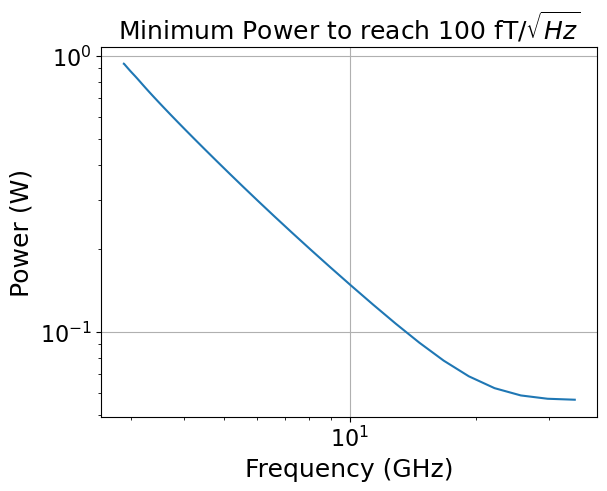

In [140]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Apply Gaussian smoothing to the power models
smoothed_opt_powers_model2 = gaussian_filter1d(opt_powers_model2, sigma=2)

ax = plt.axes() 
plt.plot(omega_s/1e9, smoothed_opt_powers_model2)
plt.xlabel('Frequency (GHz)', fontsize=18)
plt.ylabel('Power (W)', fontsize=18)
plt.title(r'Minimum Power to reach 100 fT/$\sqrt{Hz}$', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.grid()

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)  # Major tick labels

plt.show()

### Stealth Magnet

##### Permanent Magnets

We can make use of the skin effect to disguise permanent magnets in the cavity. The magnets will be coated by a thin layer of metallic material. This allows the permanent magnets to provide a DC field that penetrates through the metal of the cavity to create the bias field for large Zeeman splitting of the NV system at the location of the diamond. The metal coating over the magnets ensures the cavity mode is not disrupted by the magnets. This large Zeeman effect creates a high spin transition frequency that facilitates higher frequency operation of the magnetometer.

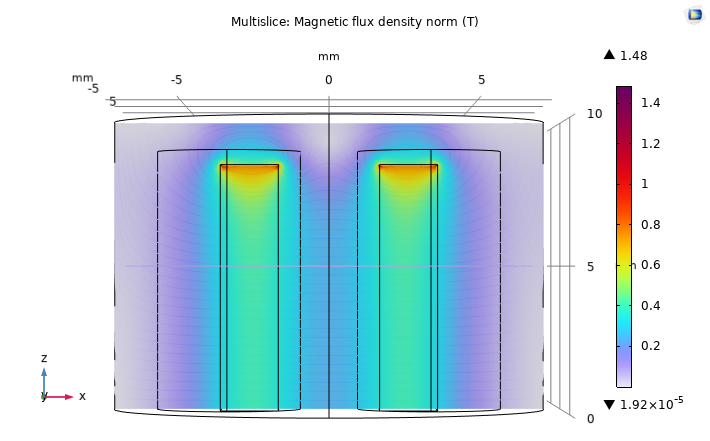

A COMSOL simulation was used to investigate the stealth magnet concept. The double re-entrance cavity from Choi & Englund "Ultrastrong magnetic light-matter interaction with cavity mode engineering" was used and altered slightly to be smaller, with proportionally larger re-entrances to acheive higher cavity frequency and ample space for magnets.

Cavity frequency was computed in COMSOL simulatin, and cavity mode volume and quality factor were computed with the assistance of COMSOL and the equations in Choi & Englund. 

Cavity Mode Frequency: $6.3112$ GHz $\newline$
Mode Volume: $8.154e-8$ $m^{3}$ $\newline$
Quality Factor: $13789$

In [96]:
# Find the optimal parameters for minimizing power given these cavity specifics
from IPython.display import display, Latex
omega_c = 6.3112e9
V = 8.154e-8
Q = 13789
kc0 = omega_c / Q   # cavity linewidth
kc1 = kc0    # cavity loop coupling
kc = kc0 + kc1   # cavity loss
max_sens = 120e-15
L=2e-3
power_100fT_6GHz, sens_args_100fT_6GHz = minimize_power_single(max_sens, omega_c, V, Q, kc0=kc0, kc1=kc1, w_bound=2e-3, L=L)
display(Latex(
    f"With this stealth magnet cavity at {omega_c / (1e9):.2f} GHz, we can achieve {max_sens:.2e} $T/\\sqrt{{Hz}}$ "
    f"at {power_100fT_6GHz * 1e3:.0f} mW of power. "
    f"The mode volume is {V:.2e} m$^3$, diamond volume is {(sens_args_100fT_6GHz[1]**2 * L):.2e} m$^3$, "
    f"and NV density is {sens_args_100fT_6GHz[2]:.3f} ppm."
))

<IPython.core.display.Latex object>

In [90]:
# Lets confirm we can realize the results stated above

import numpy as np
from IPython.display import display, Latex

PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
omega_c = 6.3112e9
V = 8.154e-8
Q = 13789
kc0 = omega_c / Q   # cavity linewidth
kc1 = kc0    # cavity loop coupling
kc = kc0 + kc1   # cavity loss
w = 2e-3
L = 2e-3
Vd = w*w*L
rho = 0.061  # NV density in ppm
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * omega_c   #h*omega
gammao = 540
gs = np.sqrt(6.626e-34 * omega_c * (28e9)**2 * mu0 / 3 / V)   #single coupling strength
Gamma = 330e3 / 4 * rho
alpha = 0.45 * 100 *rho/0.1

sens_stealth = compute_sens(rho, gammao, V, Q, PowerList, vot, energy, gs, kc, kc1, Vd)

P_per_NV = 8/(3e-3*3e-3*0.9e-3*(4 * 3.51 / 12.01 * 6.022e23))
power1 = P_per_NV * Vd * (rho * 3.51 / 12.01 * 6.022e23) 

absorp_cs = 8e-17 / (100**2)
gamma_th = 90 # thermal relxation rate
I = 1.225 * gammao - 4.809 * gamma_th + 3.085 * np.sqrt(0.1577 * gammao**2 - 0.5229 * gammao * gamma_th + gamma_th**2)
power2 = w * w * (6.626e-34*(3e8/532e-9))*I/absorp_cs

display(Latex(f"This stealth magnet model predicts sensitivity of ${sens_stealth:.2e}$ $T/\sqrt{{Hz}}$. "
                f"Optical power required is roughly ${1e3*power1:.0f}$-${1e3*power2:.0f}$ mW."))

<IPython.core.display.Latex object>

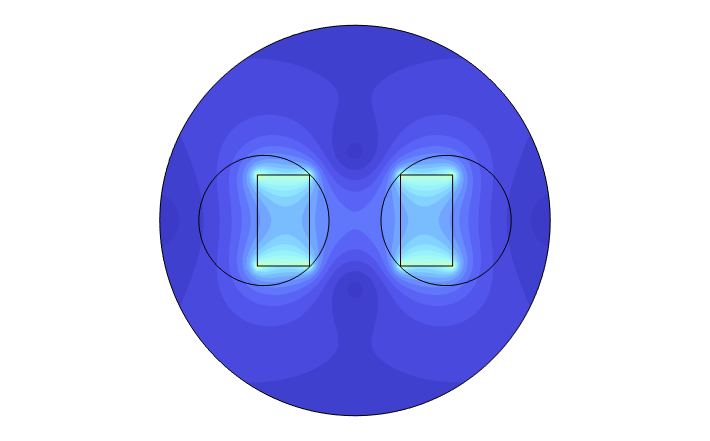

Above is a top down view of a contour plot of magnetic flux density. The circles represent the cyclindrical re-entrances, and the rectangles within them are permanent magnets. This displays the non-uniformity of the magnetic field across the region of the cavity where the diamond will be placed, which is one challenge of this setup.

### Dispersive Readout Model

In [72]:
import numpy as np
import matplotlib.pyplot as plt
def sensitivity_disp_readout(Q, rho, V, Vd):
    Delta = 2e6;
#     f = 0.1;
    f = max(V/Vd,1)

    Sphi = 1e-9; # phase noise

    hbar = 1.05e-34;  

    gs = 2; 

    muB = 9.27e-24; 

#     rho = np.logspace(8,20,40)*1e6;
    rho = rho * 3.51 / 12.01 * 6.022e23

    Tc = 1/3.3e-19/(rho*(0.95/0.05));

    T2c = 300e-6;

    T2 = 1/(1/T2c+1/Tc);

    mu0 = 4*np.pi*1e-7;

    C = 0.015;
    etaB = 8 * pow((hbar/gs/muB),3) * Delta/np.pi/Q/T2 * Sphi * 1/mu0/hbar/rho *f * np.exp(pow((T2/T2c),3))* np.exp(T2/Tc)* np.sqrt(1+1e-6/T2)
    return etaB


In [73]:
Qlist = np.logspace(2, 6, 101)   #quality factor

PowerList = np.linspace(-70, 20, 51)
vot = np.sqrt(10**(PowerList / 10) * 1e-3 * 50)
Vd = 3e-3 * 3e-3 * 0.9e-3   #diamond volume
Vlist = Vd * np.logspace(-4, 6, 101)   #cavity mode volume
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * 2.87e9   #h*omega
rho = 4

sens_V_Q = np.zeros((len(Vlist), len(Qlist)))

for ii in range(len(Vlist)):
    V = Vlist[ii]
    for jj in range(len(Qlist)):
        Q = Qlist[jj]   # Quality factor
        sens_V_Q[ii,jj] = sensitivity_disp_readout(Q,rho, V, Vd)


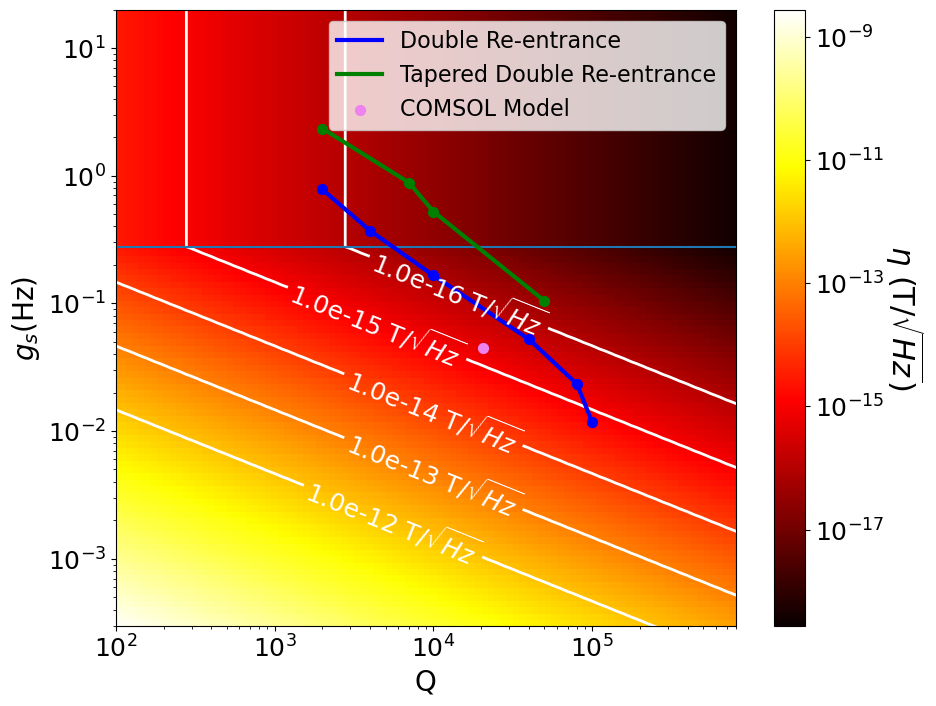

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(Qlist, np.sqrt(energy * (28e9)**2 * mu0 / 3 / Vlist))
plt.figure(figsize=(10, 8))
plt.pcolormesh(X,Y, sens_V_Q, shading='auto', norm=LogNorm(), cmap='hot')

# Add color bar and label it
cbar = plt.colorbar()
cbar.set_label(r'$\eta$ (T/$\sqrt{Hz}$)', rotation=270, labelpad=30, fontsize=22)
cbar.ax.tick_params(labelsize=18)

contour = plt.contour(X,Y, sens_V_Q, levels=[1e-16,1e-15, 1e-14, 1e-13, 1e-12], colors='w', linewidths=2)

plt.xscale('log')
plt.yscale('log')
plt.xlim([1e2, 8e5])
# plt.ylim([9e-3, 300])
plt.ylim([3e-4, 20])
plt.ylabel(r'$g_{s}$(Hz)', fontsize=20)
plt.xlabel('Q', fontsize=20)
def fmt(x):
    return f'{x:.1e} T/$\sqrt{{Hz}}$'  # Replace 'units' with your desired unit
plt.clabel(contour, inline=True, fontsize=18, fmt=fmt)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)  # Major tick labels

# Compute sensitivity for some of the cavity designs from Choi & Englund "Ultrastrong magnetic light-matter interaction with cavity mode engineering"
double_reentrance = ((9e-7, 2e3), (4e-6, 4e3), (2e-5, 1e4), (2e-4, 4e4), (1e-3, 8e4), (4e-3, 1e5))
dr_y_values, dr_x_values = zip(*double_reentrance)
plt.scatter(np.array(dr_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(dr_y_values)* (3e8/2.87e9)**3)), color='blue', zorder=5, s=50)
plt.plot(np.array(dr_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(dr_y_values)* (3e8/2.87e9)**3)), color='blue', zorder=3, linewidth=3, label='Double Re-entrance')
# long_squeeze = ((7e-4,2e3), (3e-3,1e4), (7e-3, 2e4), (1e-2,4e4), (4e-2,9e4), (7e-2,1e5), (1e-1,2e5))
# long_y_values, long_x_values = zip(*long_squeeze)
# plt.scatter(np.array(long_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(long_y_values)* (3e8/2.87e9))), color='white', s=50, zorder=5, label='Longitudinally Squeezed')
tapered = ((1e-7, 2e3), (7e-7,7e3), (2e-6, 1e4),(5e-5,5e4))
tapered_y_values, tapered_x_values = zip(*tapered)
plt.scatter(np.array(tapered_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(tapered_y_values)* (3e8/2.87e9)**3)), color='green', zorder=5, s=50)
plt.plot(np.array(tapered_x_values), np.sqrt(energy * (28e9)**2 * mu0 / 3 / (np.array(tapered_y_values)* (3e8/2.87e9)**3)), color='green', zorder=5, linewidth=3, label='Tapered Double Re-entrance')

V_comsol = 1.128e-16/((1.8026e-5)**2)
Q_comsol = 3.1972e9 * mu0 *1.128e-16 /2.2154e-14/1e-3
plt.scatter(Q_comsol,np.sqrt(6.626e-34 * 3.1972e9 * (28e9)**2 * mu0 / 3 / V_comsol), color='violet', zorder=5, s=50, label='COMSOL Model')

plt.axhline(np.sqrt(energy * (28e9)**2 * mu0 / 3 / Vd))

plt.legend(fontsize=16)

plt.show()

In [75]:
def min_power_disp(max_sens, V, Q):
    # Locate the minimum power that can achieve some sensitivity value max_sense or better based on linear scaling
    # of optical power with number of NVs
    
    P_per_NV = 8/(3e-3*3e-3*0.9e-3*(4 * 3.51 / 12.01 * 6.022e23))
    # P_per_NV = 5/(1e14)
    rholist = np.logspace(-2,1,50) * 5
    Vdlist = np.logspace(-3,3,50) * 3e-3*3e-3*0.9e-3
    powers = []
    Vds = []
    rhos = []
    for i in range(len(Vdlist)):
        Vd=Vdlist[i]
        for j in range(len(rholist)):
            rho=rholist[j]
            rhomax = 0.1231 * 4 * 1e-6 / Vd
            if rho>rhomax:
                continue
            sensi = sensitivity_disp_readout(Q, rho, V, Vd)
            if sensi < max_sens:
                power = P_per_NV * Vd * (rho * 3.51 / 12.01 * 6.022e23) 
                powers.append(power)
                Vds.append(Vd)
                rhos.append(rho)
    if not powers:
        return [None, None, None]
    min_index = powers.index(min(powers))
    return [powers[min_index], Vds[min_index], rhos[min_index]]

In [76]:
# See what the minimum power is to reach some sensitivity value or better (100fT/sqrt(Hz) in this case)
# for different combinations of mode volume and quality factor

Qlist = np.logspace(2, 6, 101)   #quality factor
Vd_ref = 3e-3 * 3e-3 * 0.9e-3   #diamond volume for reference
Vlist = Vd_ref * np.logspace(-4, 6, 101)   #cavity mode volume
mu0 = 4 * np.pi * 1e-7   
energy = 6.626e-34 * 2.87e9   #h*omega

max_sens = 1e-15

sens_args = np.zeros((len(Vlist), len(Qlist)), dtype=object)
opt_power_lin = np.zeros((len(Vlist), len(Qlist)))
for i in range(len(Vlist)):
    V=Vlist[i]
    for j in range(len(Qlist)):
        Q=Qlist[j]
        power, Vd, rho =  min_power_disp(max_sens, V, Q)
        opt_power_lin[i,j] = power
        sens_args[i,j] = np.array([Vd,rho])

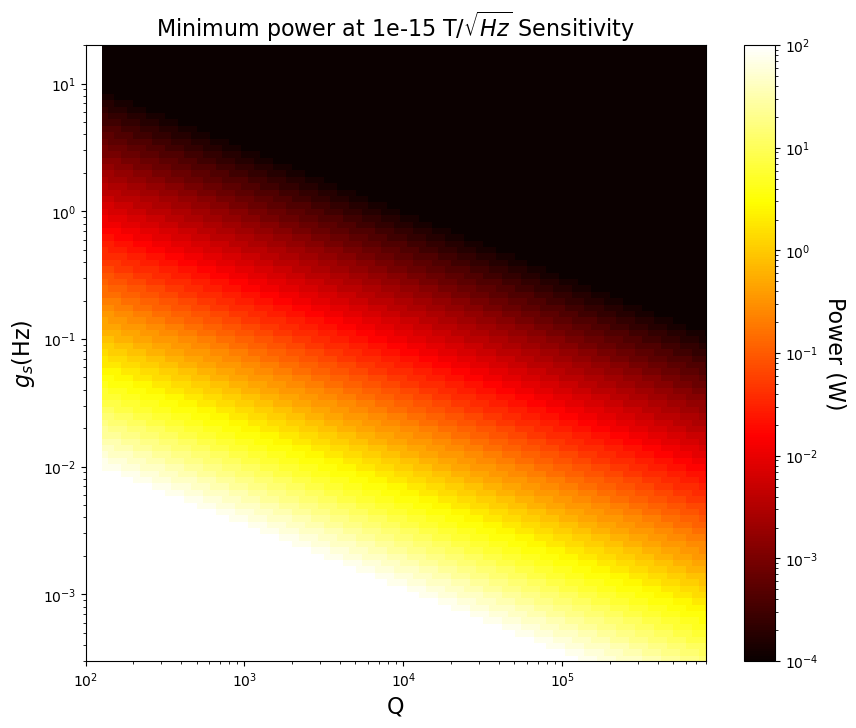

In [77]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(Qlist, np.sqrt(energy * (28e9)**2 * mu0 / 3 / Vlist))
plt.figure(figsize=(10, 8))
plt.pcolormesh(X,Y, opt_power_lin, shading='auto', norm=LogNorm(), cmap='hot')

# Add color bar and label it
cbar = plt.colorbar()
cbar.set_label('Power (W)', rotation=270, labelpad=20, fontsize=16)

# contour = plt.contour(X,Y, sensitivity, levels=[1.3e-14, 1e-13, 1e-12, 1e-11], colors='w', linewidths=2)

plt.xscale('log')
plt.yscale('log')
plt.xlim([1e2, 8e5])
# plt.ylim([9e-3, 300])
plt.ylim([3e-4, 20])
plt.title(f'Minimum power at {max_sens} T/$\sqrt{{Hz}}$ Sensitivity', fontsize=16)
plt.ylabel(r'$g_{s}$(Hz)', fontsize=16)
plt.xlabel('Q', fontsize=16)

plt.show()